For this Assignment I've worked with a teammate,
# My McGill ID: 261022581
# My Teammate's ID: 260518646

In [ ]:
from bernoulli_bandit import Bernoullibandit
import numpy as np
import matplotlib.pyplot as plt


# Question - 1

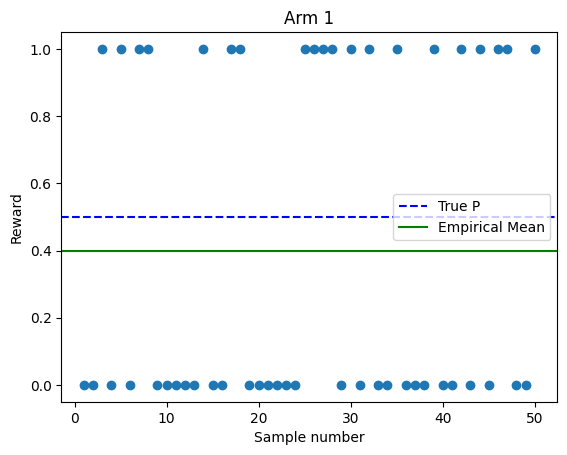

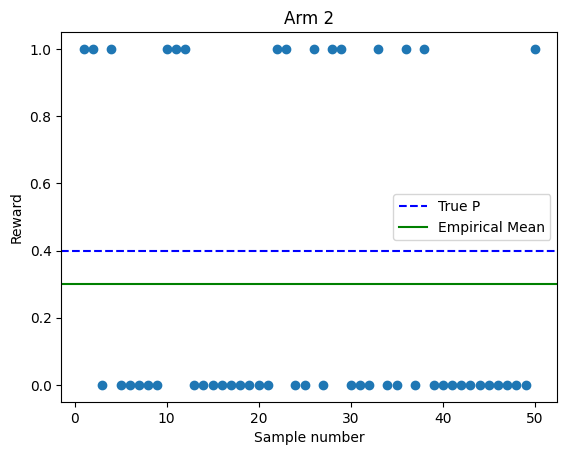

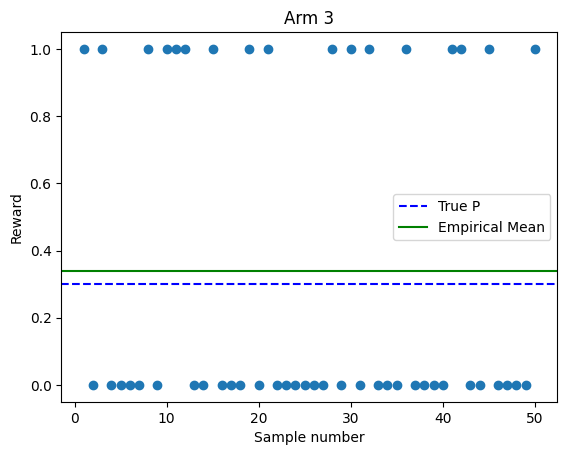

In [ ]:
#Question 1
delta = 0.1
p = [0.5, 0.5-delta, 0.5-2*delta]
p_i = 0.0
bandit_1 = Bernoullibandit(p=p,p_i=p_i)
number_samples = 50

num_samples = 50
samples = [[bandit_1.sample(i) for _ in range(num_samples)] for i in range(bandit_1.k)]
#samples are have three different types of lists inside each list have three different types of bandits inside of it
# number_samples = 100
# samples_100 = [[bandit.sample(i) for _ in range(number_samples)] for i in range(bandit.k)]
for i in range(bandit_1.k):
    plt.figure
    plt.xlabel("Sample number")
    plt.ylabel("Reward")
    plt.title(f"Arm {i+1}")
    plt.scatter(range(1, number_samples+1), samples[i])
    plt.axhline(p[i], color ="b", linestyle = "--", label = "True P")
    plt.axhline(np.mean(samples[i]), color = "g", linestyle = "-", label = "Empirical Mean")
    plt.legend()
    plt.show()




# Question - 2

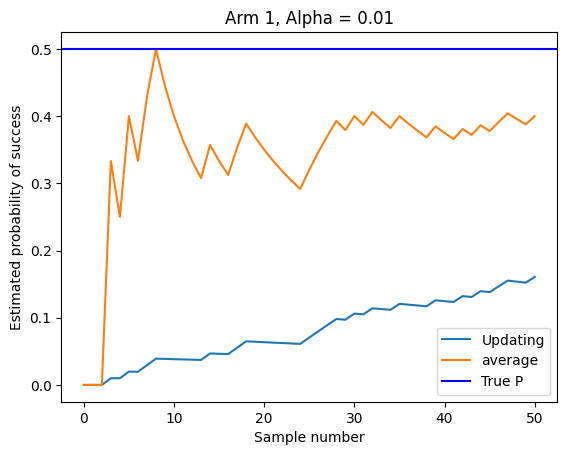

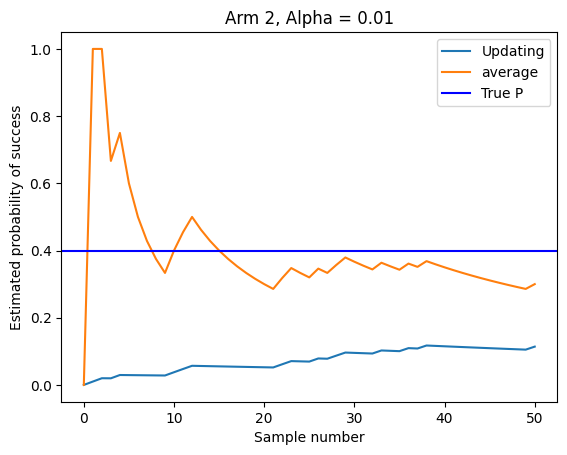

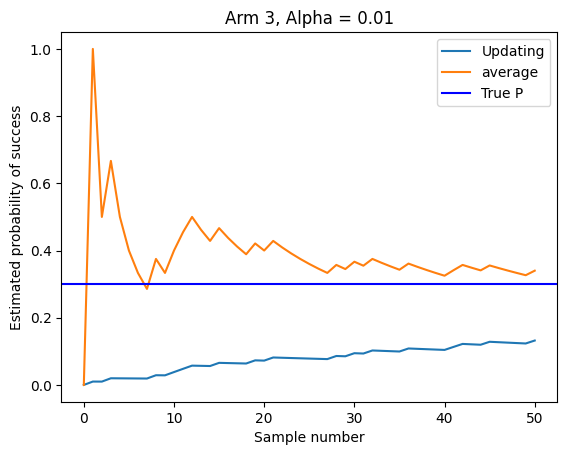

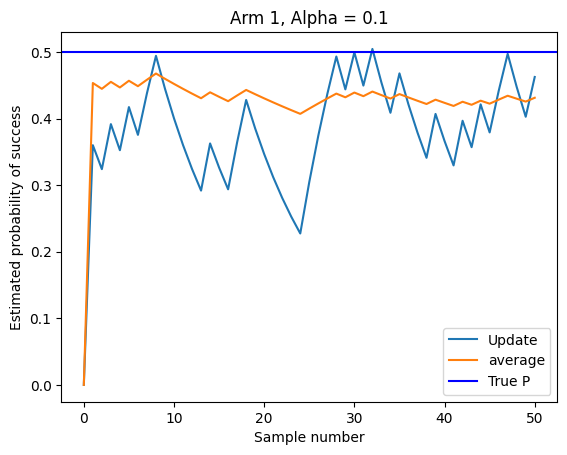

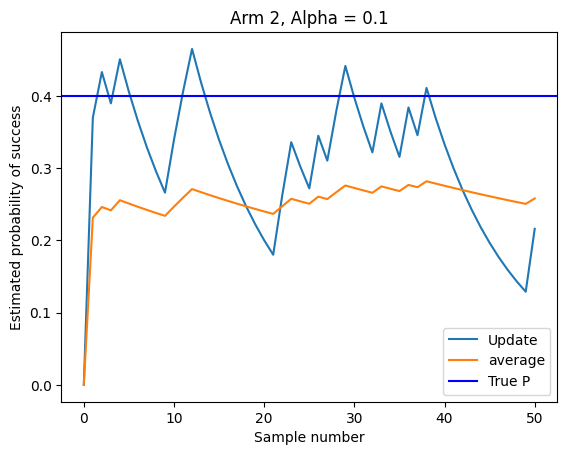

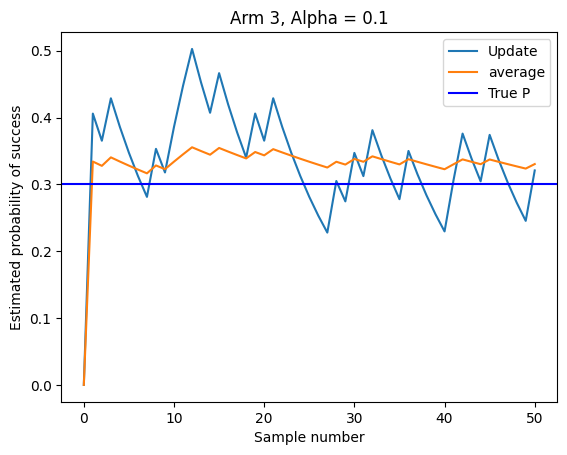

In [ ]:
#Question 2
bandit_2 = Bernoullibandit(p,p_i=0)
for i in range(bandit_2.k):
    plt.figure()
    plt.xlabel("Sample number")
    plt.ylabel("Estimated probability of success")
    alpha = 0.01
    plt.title(f"Arm {i+1}, Alpha = {alpha}")
    p_update = [0.0]
    for j in range(number_samples):
        bandit_2.update(i, samples[i][j], alpha)
        p_update.append(bandit_2.est_p[i])
    plt.plot(range(number_samples+1), p_update, label = "Updating")

    p_updateAvg = [0.0]
    for j in range(number_samples):
        bandit_2.updateAvg(i, samples[i][j])
        p_updateAvg.append(bandit_2.est_p[i])

    plt.plot(range(number_samples+1), p_updateAvg, label = "average")

    plt.axhline(p[i], color = "b", linestyle = "-", label = "True P")
    plt.legend()
    plt.show()


for i in range(bandit_2.k):
    plt.figure()
    plt.xlabel("Sample number")
    plt.ylabel("Estimated probability of success")
    alpha = 0.1
    plt.title(f"Arm {i+1}, Alpha = {alpha}")
    p_update = [0.0]
  
    for j in range(number_samples):
        bandit_2.update(i, samples[i][j], alpha)
        p_update.append(bandit_2.est_p[i])
    plt.plot(range(number_samples+1), p_update, label = "Update")

    p_updateAvg = [0.0]
    for j in range(number_samples):
        bandit_2.updateAvg(i, samples[i][j])
        p_updateAvg.append(bandit_2.est_p[i])

    plt.plot(range(number_samples+1), p_updateAvg, label = "average")
    
    plt.axhline(p[i], color = "b", linestyle = "-", label = "True P")
    plt.legend()
    plt.show()





# Question - 3


From the below graphs, we can see that for higher values of learning rate, estimated values of rewards for each arms fail to converge, after 100 the experiments run 100 times, it has high variance. For Arm-1, averaging of the rewards performs better than updating rewards at both alpha values. Meanwhile, for Arm-2 & 3, both averaging and updating fails to converge at true value of reward. In the case of alpha - 0.01, for all the arms, averaging performs better than updating. A similar trend can also be seen in the case of alpha = 0.1 however, updating of estimated values have lower errors compared to alpha = 0.01 in addition to this, high variance in values can be seen in this case. For better performance, alpha = 0.01 with more number of sample would give more accure results comapared to alpha = 0.1. There is a trade off between speed of convergence and the variance of the estimate.

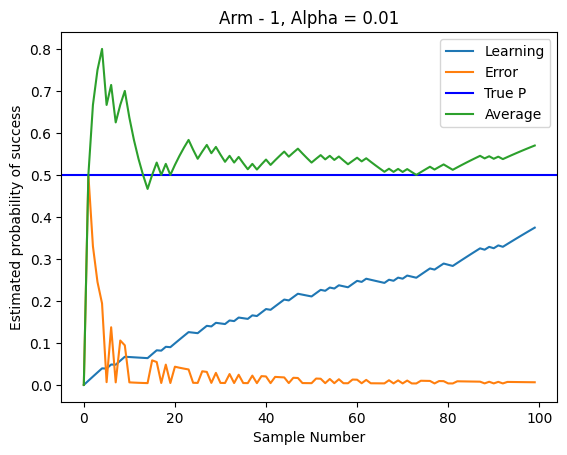

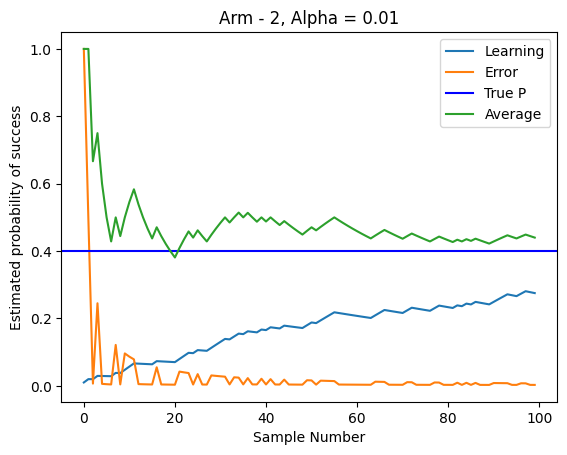

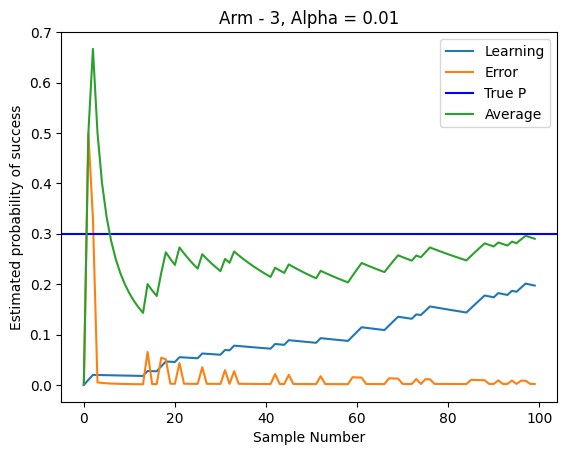

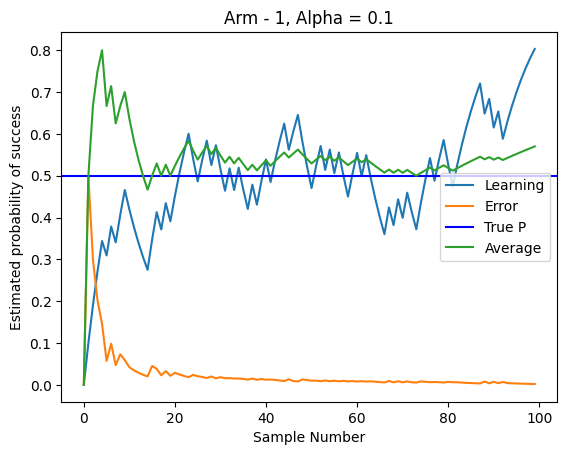

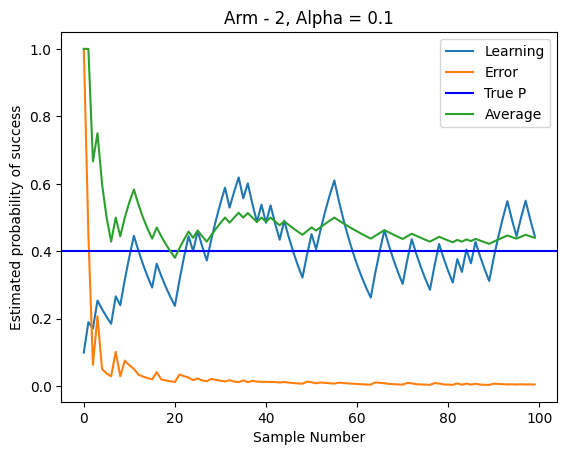

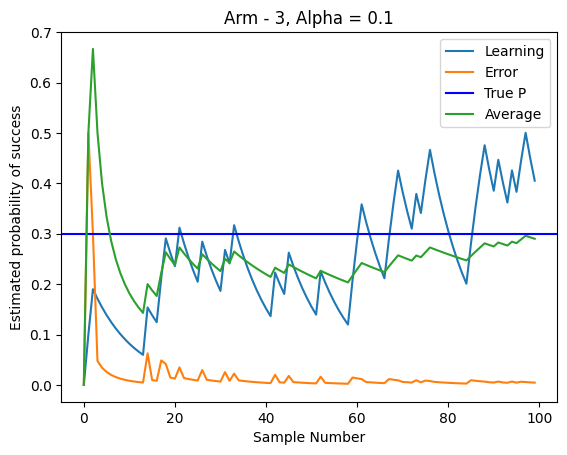

In [ ]:
#Question 3
bandit_3a = Bernoullibandit(p,p_i=0)
num_samples = 100
samples = [[bandit_3a.sample(i) for _  in range(num_samples)] for i in range(bandit_3a.k)]
alpha_1 = 0.01
for i in range(bandit_3a.k):
    plt.figure()
    plt.xlabel("Sample Number")
    plt.ylabel("Estimated probability of success")
    plt.title(f"Arm - {i+1}, Alpha = {alpha_1}")
    # alpha = 0.01
    p_update = []
    p_updateAvg = []
    error = [[], [], []]
    # std_error = [[], [], []]
    for j in range(num_samples):
        error[i].append(abs(bandit_3a.std_error(i, samples[i][j], j+1)))
        bandit_3a.update(i,samples[i][j], alpha_1)
    
        # bandit_3.updateAvg(i,samples[i][j])
        p_update.append(bandit_3a.est_p[i])
    # std_error = np.std(error[i])/(num_samples**0.5)
    plt.plot(range(num_samples), p_update, label = "Learning")
    plt.plot(range(num_samples), error[i], label="Error")
    for j in range(num_samples):
        bandit_3a.updateAvg(i, samples[i][j])
        p_updateAvg.append(bandit_3a.est_p[i])
    plt.axhline(p[i], color="b", linestyle="-", label="True P")
    plt.plot(range(num_samples), p_updateAvg, label = "Average")
    plt.legend()
    plt.show()

bandit_3b = Bernoullibandit(p,p_i=0)
alpha_2 = 0.1
for i in range(bandit_3b.k):
    plt.figure()
    plt.xlabel("Sample Number")
    plt.ylabel("Estimated probability of success")
    plt.title(f"Arm - {i+1}, Alpha = {alpha_2}")
    # alpha = 0.1
    p_update = []
    p_updateAvg = []
    error = [[], [], []]
    for j in range(num_samples):
        error[i].append(abs(bandit_3b.std_error(i, samples[i][j], j+1)))
        bandit_3b.update(i,samples[i][j], alpha_2)
        # bandit_3.updateAvg(i,samples[i][j])
        p_update.append(bandit_3b.est_p[i])
    plt.plot(range(num_samples), p_update, label = "Learning")
    plt.plot(range(num_samples), error[i], label="Error")
    for j in range(num_samples):
        bandit_3b.updateAvg(i, samples[i][j])
        p_updateAvg.append(bandit_3b.est_p[i])
    plt.axhline(p[i], color="b", linestyle="-", label="True P")
    plt.plot(range(num_samples), p_updateAvg, label = "Average")
    plt.legend()
    plt.show()



In [ ]:
num_runs = 100
num_timestep = 1000
rewards_1 = np.zeros((num_runs, num_timestep))
rewards_2 = np.zeros((num_runs, num_timestep))
rewards_3 = np.zeros((num_runs, num_timestep))
rewards_4 = np.zeros((num_runs, num_timestep))
rewards_5 = np.zeros((num_runs, num_timestep))
optimal_action_1 = np.zeros((num_runs, num_timestep))
optimal_action_2 = np.zeros((num_runs, num_timestep))
optimal_action_3 = np.zeros((num_runs, num_timestep))
optimal_action_4 = np.zeros((num_runs, num_timestep))
optimal_action_5 = np.zeros((num_runs, num_timestep))
first_action_1 = np.zeros(num_timestep)
first_action_2 = np.zeros(num_timestep)
first_action_3 = np.zeros(num_timestep)
first_action_4 = np.zeros(num_timestep)
first_action_5 = np.zeros(num_timestep)
error_1 = np.zeros((num_runs, num_timestep))
error_2 = np.zeros((num_runs, num_timestep))
error_3 = np.zeros((num_runs, num_timestep))
error_4 = np.zeros((num_runs, num_timestep))
error_5 = np.zeros((num_runs, num_timestep))
# first_best = 0
regret_1 = np.zeros((num_runs,num_timestep))
regret_2 = np.zeros((num_runs,num_timestep))
regret_3 = np.zeros((num_runs,num_timestep))
regret_4 = np.zeros((num_runs,num_timestep))
regret_5 = np.zeros((num_runs,num_timestep))
best_action_1 = np.ones((num_runs, num_timestep))*(-1)
best_action_2 = np.ones((num_runs, num_timestep))*(-1)
best_action_3 = np.ones((num_runs, num_timestep))*(-1)
best_action_4 = np.ones((num_runs, num_timestep))*(-1)
best_action_5 = np.ones((num_runs, num_timestep))*(-1)
best = np.argmax(p)
first_fraction_1 = []
first_fraction_2 = []
first_fraction_3 = []
first_fraction_4 = []
first_fraction_5 = []

# Q 4.a

As per average rewards graphs, we can see that the algorithm performs better when epsilon = 0. Initially for each arms when values are zero, for the case of epsilon = 0, the standard error is very high, due to higher value of success for Arm - 1, as estimated values converging towards true values of rewards, standard error decreseas drastically for epsilon = 0. In the case of multi arm bandit, where there is only one state and action, effect of epsilon can't be obeseved for very low values of epsilon. However, for higher values of epsilon such as 0.5 and 1 average rewards are low compared to lower values because AI takes completely random actions at higher values of epsilon.

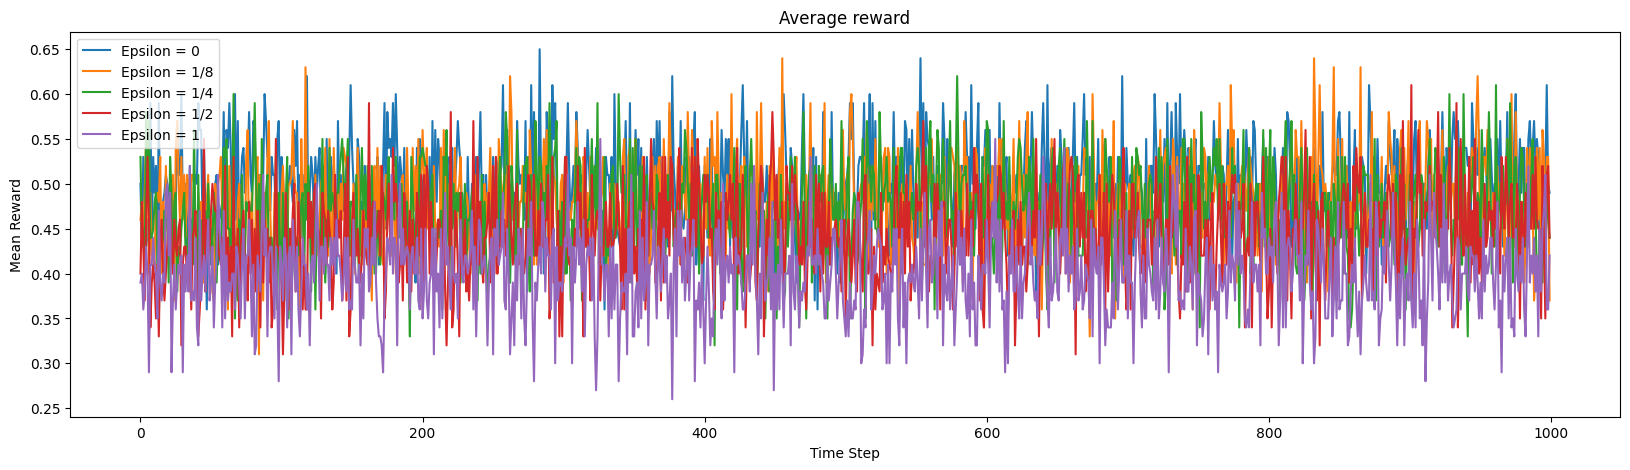

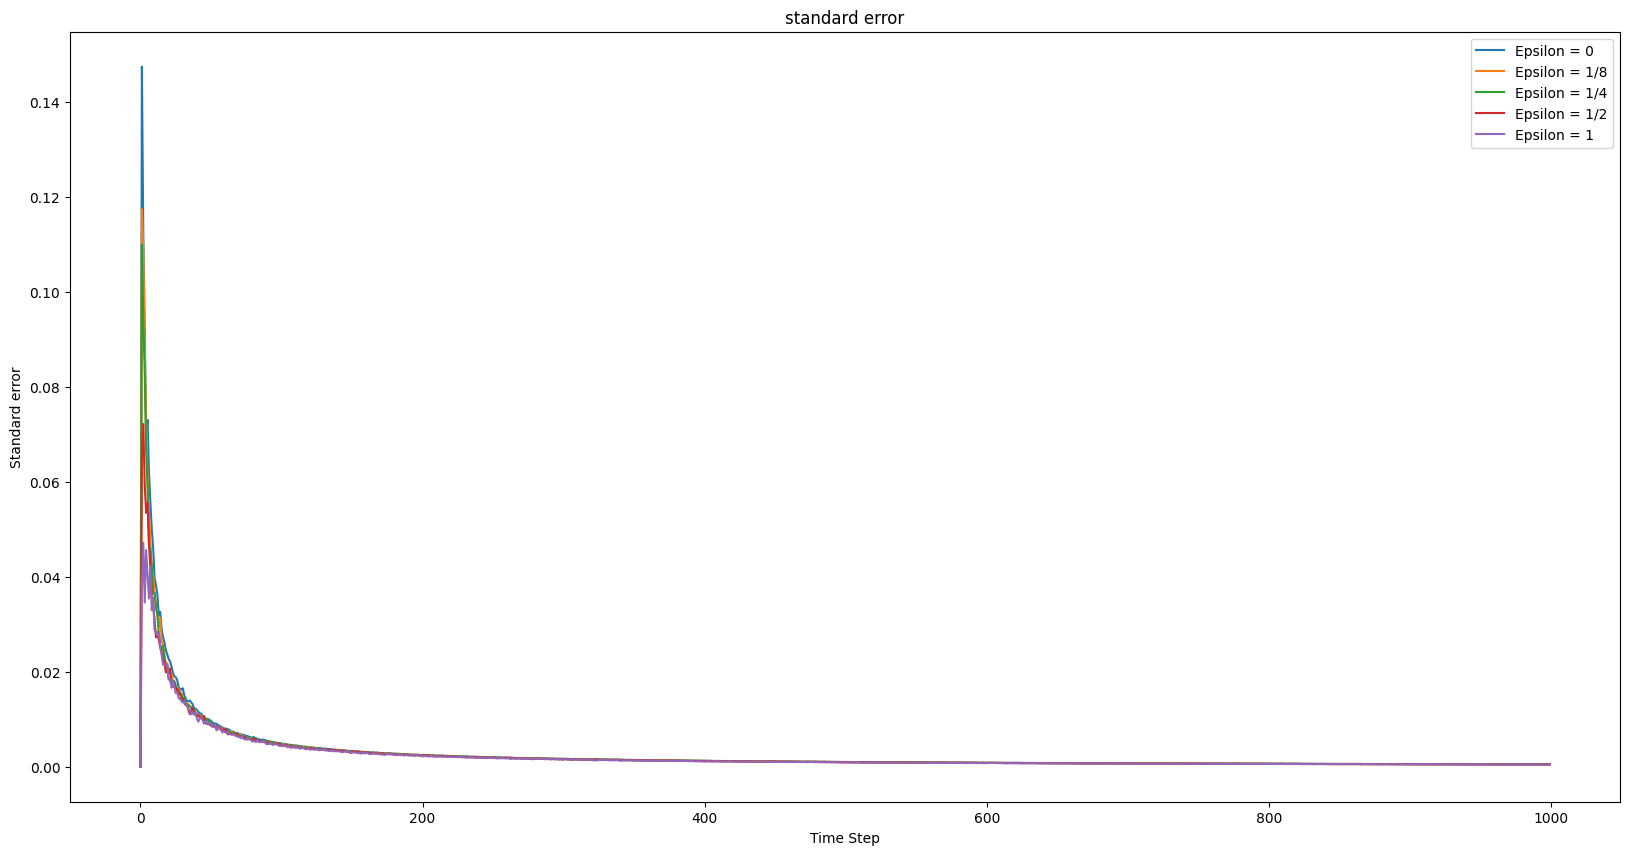

In [ ]:
#Question 4a
for i in range(num_runs):
    bandit_41 = Bernoullibandit(p,p_i=0.0)
    bandit_42 = Bernoullibandit(p,p_i=0.0)
    bandit_43 = Bernoullibandit(p,p_i=0.0)
    bandit_44 = Bernoullibandit(p,p_i=0.0)
    bandit_45 = Bernoullibandit(p,p_i=0.0)
    for j in range(num_timestep):
        action_1 = bandit_41.epsilon_greedy(epsilon=0)
        action_2 = bandit_42.epsilon_greedy(epsilon=(1/8))
        action_3 = bandit_43.epsilon_greedy(epsilon=(1/4))
        action_4 = bandit_44.epsilon_greedy(epsilon=(1/2))
        action_5 = bandit_45.epsilon_greedy(epsilon=1)
        reward_1 = bandit_41.sample(action_1)
        reward_2 = bandit_42.sample(action_2)
        reward_3 = bandit_43.sample(action_3)
        reward_4 = bandit_44.sample(action_4)
        reward_5 = bandit_45.sample(action_5)
        bandit_41.updateAvg(action_1, reward_1)
        bandit_42.updateAvg(action_2, reward_2)
        bandit_43.updateAvg(action_3, reward_3)
        bandit_44.updateAvg(action_4, reward_4)
        bandit_45.updateAvg(action_5, reward_5)
        rewards_1[i,j] = reward_1
        rewards_2[i,j] = reward_2
        rewards_3[i,j] = reward_3
        rewards_4[i,j] = reward_4
        rewards_5[i,j] = reward_5
        error_1[i,j] = abs(bandit_41.std_error(action_1, reward_1, j+1))
        error_2[i,j] = abs(bandit_42.std_error(action_2, reward_2, j+1))
        error_3[i,j] = abs(bandit_43.std_error(action_3, reward_3, j+1))
        error_4[i,j] = abs(bandit_44.std_error(action_4, reward_4, j+1))
        error_5[i,j] = abs(bandit_45.std_error(action_5, reward_5, j+1))
            # optimal_action[i,j] = action+1
            # if action == 0:
            #     first_action += 1
mean_rewards_1 = np.mean(rewards_1, axis=0)
mean_rewards_2 = np.mean(rewards_2, axis=0)
mean_rewards_3 = np.mean(rewards_3, axis=0)
mean_rewards_4 = np.mean(rewards_4, axis=0)
mean_rewards_5 = np.mean(rewards_5, axis=0)
mean_error_1 = np.mean(error_1, axis=0)
mean_error_2 = np.mean(error_2, axis=0)
mean_error_3 = np.mean(error_3, axis=0)
mean_error_4 = np.mean(error_4, axis=0)
mean_error_5 = np.mean(error_5, axis=0)
std_rewards_1 = np.std(rewards_1, axis=0)

    # first_num_runs = (first_action/num_runs)
plt.figure(figsize=[20,5])
plt.title("Average reward")
plt.xlabel("Time Step")
plt.ylabel("Mean Reward")
plt.plot(range(num_timestep), mean_rewards_1, label = "Epsilon = 0" )
plt.plot(range(num_timestep), mean_rewards_2, label = "Epsilon = 1/8")
plt.plot(range(num_timestep), mean_rewards_3, label = "Epsilon = 1/4")
plt.plot(range(num_timestep), mean_rewards_4, label = "Epsilon = 1/2")
plt.plot(range(num_timestep), mean_rewards_5, label = "Epsilon = 1")
plt.legend()
plt.show()

plt.figure(figsize=[20,10])
plt.title("standard error")
plt.xlabel("Time Step")
plt.ylabel("Standard error")
plt.plot(range(num_timestep), mean_error_1, label = "Epsilon = 0" )
plt.plot(range(num_timestep), mean_error_2, label = "Epsilon = 1/8")
plt.plot(range(num_timestep), mean_error_3, label = "Epsilon = 1/4")
plt.plot(range(num_timestep), mean_error_4, label = "Epsilon = 1/2")
plt.plot(range(num_timestep), mean_error_5, label = "Epsilon = 1")
plt.legend()
plt.show()

# mean_first_best = np.mean(first_action)

# plt.figure()
# plt.xlabel("Time step")
# plt.ylabel("Fraction of runs")
# plt.plot(range(num_timestep), first_num_runs)

# # plt.axhline(mean_first_best, color = "r", linestyle = "--")
# plt.show()


# Q4.b


As per the probability of success of each arm, arm-1 is the truly best, in the given graph, it shows the out of 100 runs how many times arm 1 was chosen as per epsilon-greedy algorithm. For epsilon = 0, arm-1 is chosen 100% of the time. Initially, when estimated values for each arm is zero, values are very low copared to later, as AI learns the true values of rewards, it chooses arm-1 more often. For higher values of epsilon, arm-1 is chosen less often compared to lower values of epsilon. It can be seen that this value is very low in the case of epsilon = 1. This is because, AI takes completely random actions at higher values of epsilon.

# Q 4.c


Intantaneous regret is the difference between the best arm and the arm chosen by the AI. As per the graph, we can see that for epsilon = 0, the regret is very high initially, as AI chooses arm-1 100% of the time. However, as AI learns the true values of rewards, the regret decreases drastically. As, epsilon values increases, the regret increases. This is because, AI takes completely random actions at higher values of epsilon.

# Q 4.d

Total regret is the cumulative instantaneous regret. It gives more accurate information about the convergence of the estimated rewards to the true rewards compared to average rewards data. In the case of average reward, we can see that the variance if very high and it is very difficult to observe the trend. However, in the case of total regret, we can see that the trend is very clear. Our main goal is to maximize the total rewards at the same time minimize the total regret, in the case of epsilon = 0, the total regret is low compared to higher values of epsilon.  

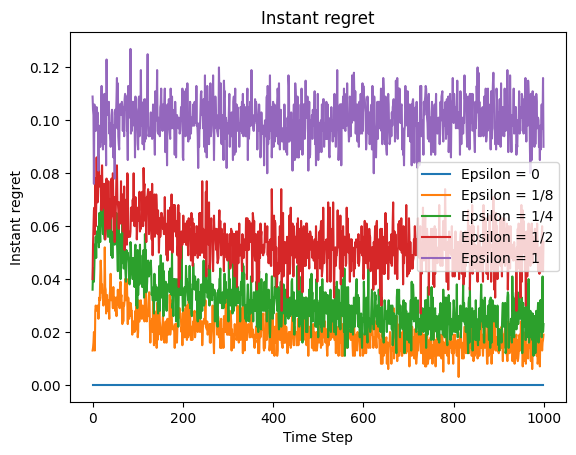

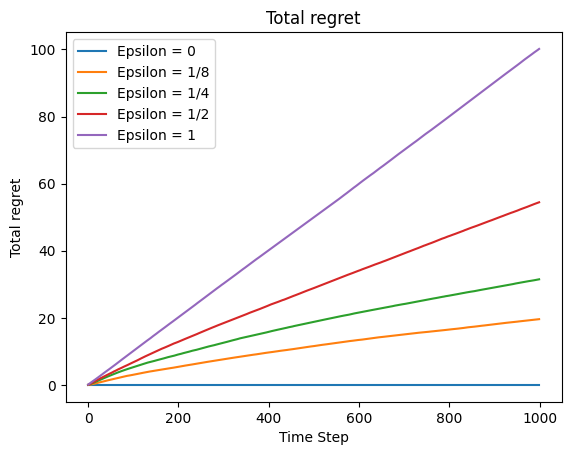

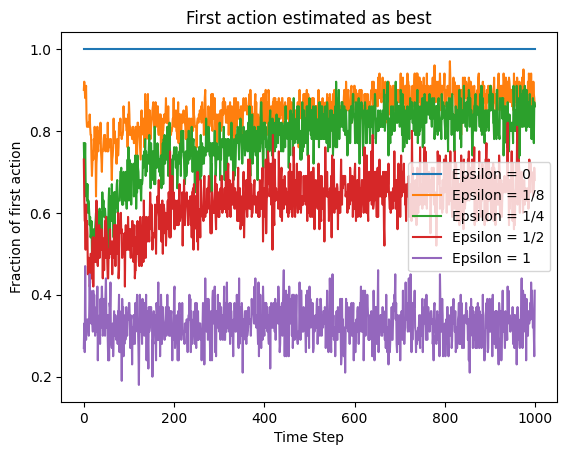

In [ ]:
for i in range(num_runs):
    bandit_4b1 = Bernoullibandit(p,p_i=0.0)
    bandit_4b2 = Bernoullibandit(p,p_i=0.0)
    bandit_4b3 = Bernoullibandit(p,p_i=0.0)
    bandit_4b4 = Bernoullibandit(p,p_i=0.0)
    bandit_4b5 = Bernoullibandit(p,p_i=0.0)
    for j in range(num_timestep):
        action_1 = bandit_4b1.epsilon_greedy(epsilon=0)
        action_2 = bandit_4b2.epsilon_greedy(epsilon=(1/8))
        action_3 = bandit_4b3.epsilon_greedy(epsilon=(1/4))
        action_4 = bandit_4b4.epsilon_greedy(epsilon=(1/2))
        action_5 = bandit_4b5.epsilon_greedy(epsilon=1)
        reward_1 = bandit_4b1.sample(action_1)
        reward_2 = bandit_4b2.sample(action_2)
        reward_3 = bandit_4b3.sample(action_3)
        reward_4 = bandit_4b4.sample(action_4)
        reward_5 = bandit_4b5.sample(action_5)
        bandit_4b1.updateAvg(action_1, reward_1)
        bandit_4b2.updateAvg(action_2, reward_2)
        bandit_4b3.updateAvg(action_3, reward_3)
        bandit_4b4.updateAvg(action_4, reward_4)
        bandit_4b5.updateAvg(action_5, reward_5)
        best_action_1[i,j] = action_1
        best_action_2[i,j] = action_2
        best_action_3[i,j] = action_3
        best_action_4[i,j] = action_4
        best_action_5[i,j] = action_5
        regret_1[i,j] = p[best] - p[action_1]
        regret_2[i,j] = p[best] - p[action_2]
        regret_3[i,j] = p[best] - p[action_3]
        regret_4[i,j] = p[best] - p[action_4]
        regret_5[i,j] = p[best] - p[action_5]
instant_regret_1 = np.mean(regret_1, axis=0)
instant_regret_2 = np.mean(regret_2, axis=0)
instant_regret_3 = np.mean(regret_3, axis=0)
instant_regret_4 = np.mean(regret_4, axis=0)
instant_regret_5 = np.mean(regret_5, axis=0)
first_fraction_1 = bandit_4b1.first_fraction(num_runs, num_timestep, best_action_1)
first_fraction_2 = bandit_4b2.first_fraction(num_runs, num_timestep, best_action_2)
first_fraction_3 = bandit_4b3.first_fraction(num_runs, num_timestep, best_action_3)
first_fraction_4 = bandit_4b4.first_fraction(num_runs, num_timestep, best_action_4)
first_fraction_5 = bandit_4b5.first_fraction(num_runs, num_timestep, best_action_5)
total_regret_1 = np.cumsum(instant_regret_1)
total_regret_2 = np.cumsum(instant_regret_2)
total_regret_3 = np.cumsum(instant_regret_3)
total_regret_4 = np.cumsum(instant_regret_4)
total_regret_5 = np.cumsum(instant_regret_5)
#plot fraction of the first action taken
plt.figure()
plt.title("Instant regret")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_1, label="Epsilon = 0")
plt.plot(range(num_timestep), instant_regret_2, label="Epsilon = 1/8")
plt.plot(range(num_timestep), instant_regret_3, label="Epsilon = 1/4")
plt.plot(range(num_timestep), instant_regret_4, label="Epsilon = 1/2")
plt.plot(range(num_timestep), instant_regret_5, label="Epsilon = 1")
plt.legend()
plt.show()
#Instant regret
plt.figure()
plt.title("Total regret")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_1, label="Epsilon = 0")
plt.plot(range(num_timestep), total_regret_2, label="Epsilon = 1/8")
plt.plot(range(num_timestep), total_regret_3, label="Epsilon = 1/4")
plt.plot(range(num_timestep), total_regret_4, label="Epsilon = 1/2")
plt.plot(range(num_timestep), total_regret_5, label="Epsilon = 1")
plt.legend()
plt.show()
#Fraction of first move
plt.figure()
plt.title("First action estimated as best")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_1, label="Epsilon = 0")
plt.plot(range(num_timestep), first_fraction_2, label="Epsilon = 1/8")
plt.plot(range(num_timestep), first_fraction_3, label="Epsilon = 1/4")
plt.plot(range(num_timestep), first_fraction_4, label="Epsilon = 1/2")
plt.plot(range(num_timestep), first_fraction_5, label="Epsilon = 1")
plt.legend()
plt.show()



# Q5

If we compare learning rates with averaging, averaging performs better than updating the values of estimated rewards. However, if we compared learning rates for the same epsilon values learning rate of 0.001 performs better than other values. The main reason for this is, the variance of the estimated rewards is very high for higher values of learning rate. In the question 2 where at lower learning rates estimated values were failed to converge, here becuase of more number of timesteps estimated values converges to true values. For comparing the results, I consider, total regret since, obeserve the trend of the total regret is easy compared to other graphs.

In [ ]:
#Question 5 
# Average reward over time and standard error over the 100 runs
reward_11 = np.zeros((num_runs, num_timestep))
reward_12 = np.zeros((num_runs, num_timestep))
reward_21 = np.zeros((num_runs, num_timestep))
reward_22 = np.zeros((num_runs, num_timestep))
action_11 = np.zeros((num_runs, num_timestep), dtype = int)
action_12 = np.zeros((num_runs, num_timestep), dtype = int)
regret_11 = np.zeros((num_runs, num_timestep))
regret_12 = np.zeros((num_runs, num_timestep))
reward_21 = np.zeros((num_runs, num_timestep))
reward_22 = np.zeros((num_runs, num_timestep))
action_21 = np.zeros((num_runs, num_timestep), dtype = int)
action_22 = np.zeros((num_runs, num_timestep), dtype = int)
regret_21 = np.zeros((num_runs, num_timestep))
regret_22 = np.zeros((num_runs, num_timestep))
error_11 = np.zeros((num_runs, num_timestep))
error_12 = np.zeros((num_runs, num_timestep))
error_21 = np.zeros((num_runs, num_timestep))
error_22 = np.zeros((num_runs, num_timestep))
delta = 0.1
p = [0.5, 0.5-delta, 0.5-2*delta]
p_i = 0.0



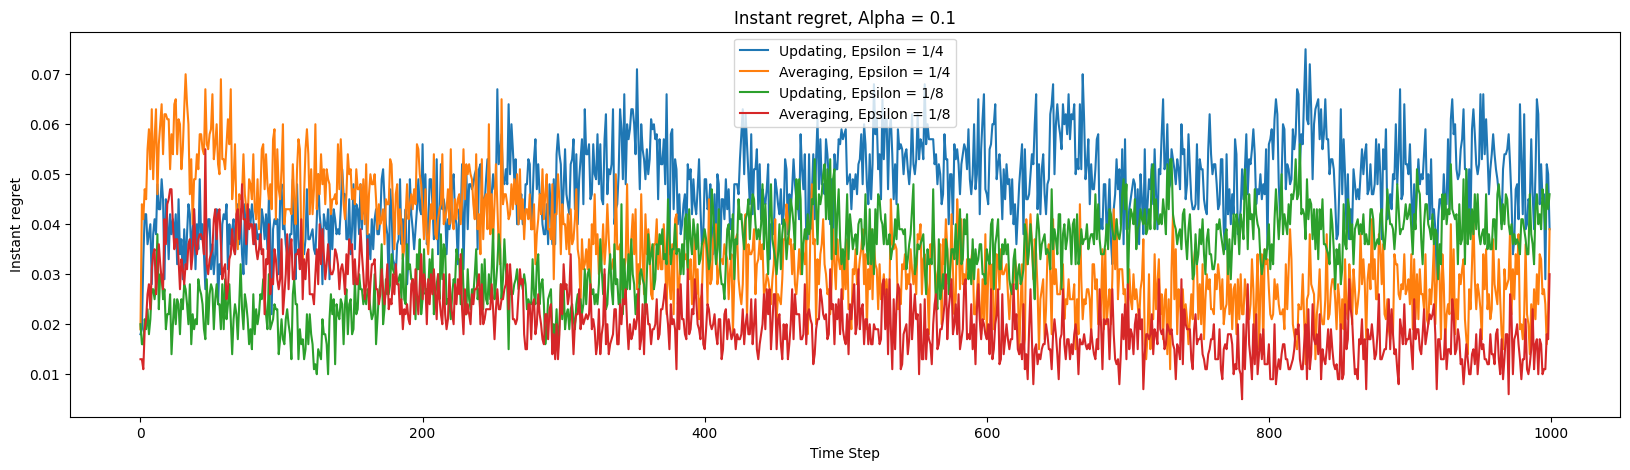

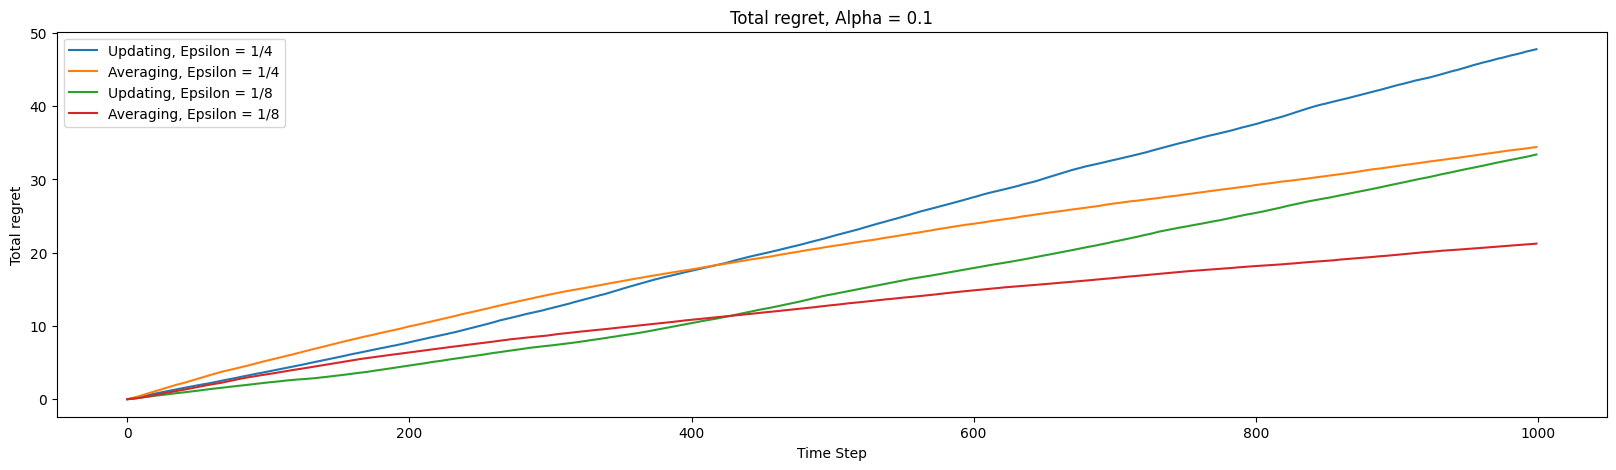

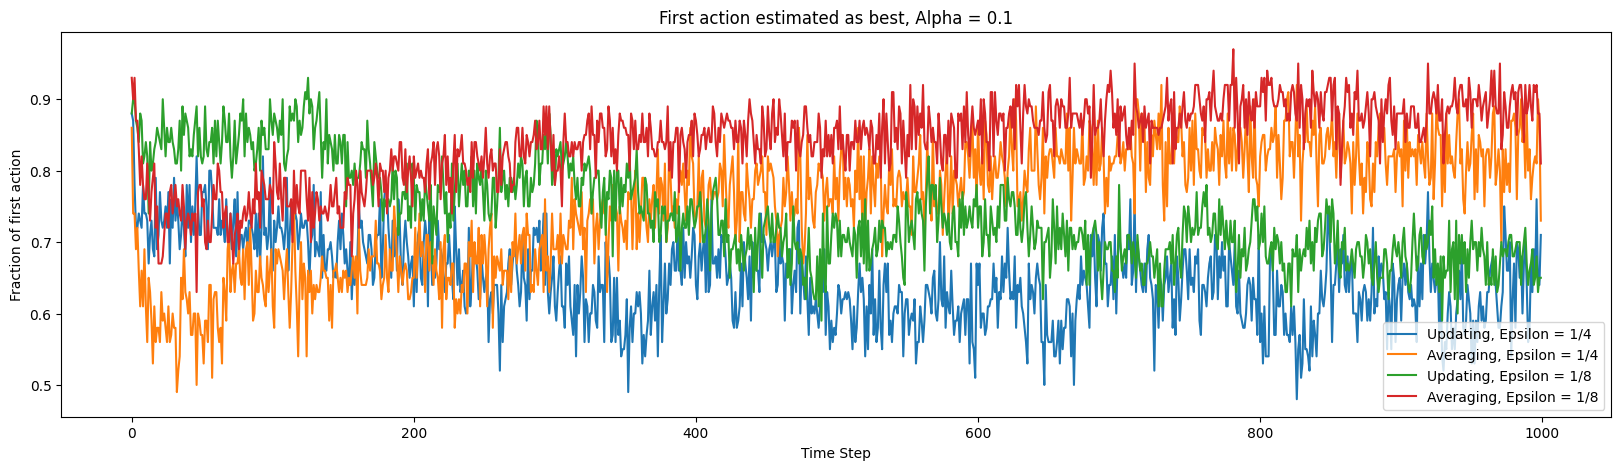

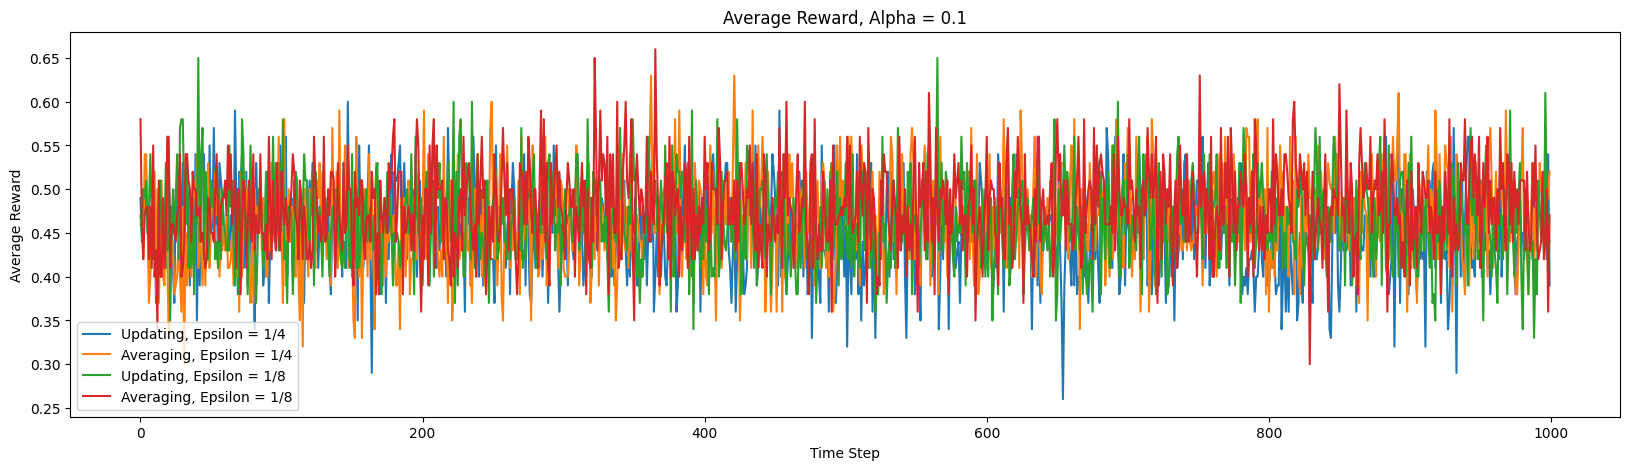

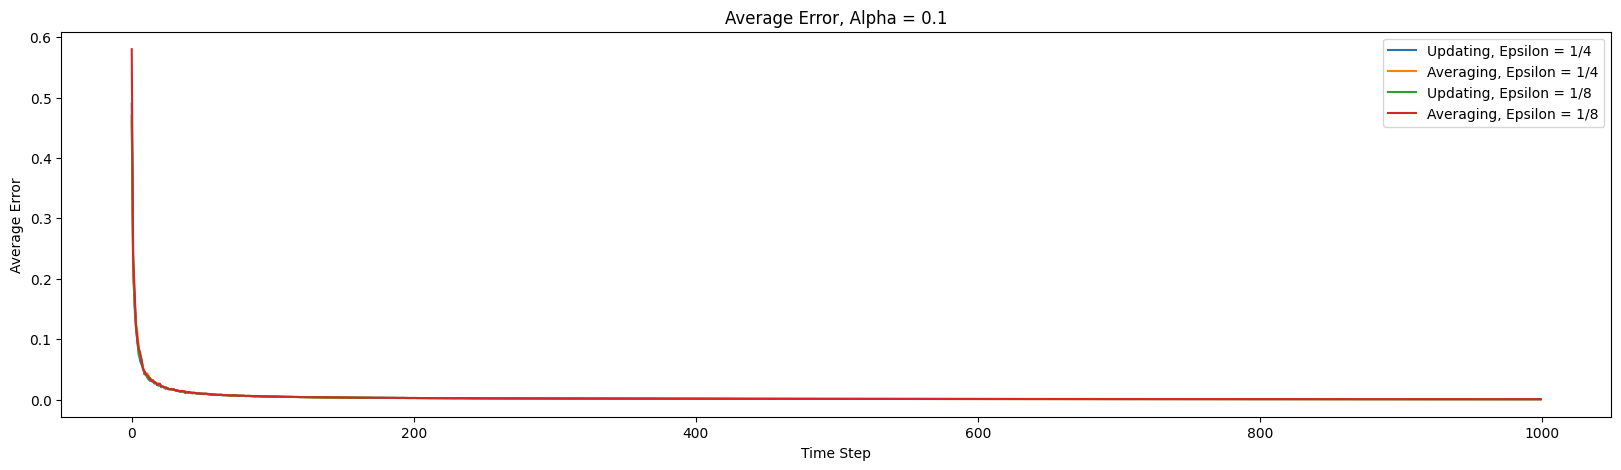

In [ ]:
alpha = 0.1
for i in range(num_runs):
    bandit_511 = Bernoullibandit(p=p,p_i=p_i)
    bandit_512 = Bernoullibandit(p=p,p_i=p_i)
    bandit_521 = Bernoullibandit(p=p,p_i=p_i)
    bandit_522 = Bernoullibandit(p=p,p_i=p_i)
    for j in range(num_timestep):
        action11 = (bandit_511.epsilon_greedy(epsilon=(1/4)))
        action12 = (bandit_512.epsilon_greedy(epsilon=(1/4)))
        action21 = (bandit_521.epsilon_greedy(epsilon=(1/8)))
        action22 = (bandit_522.epsilon_greedy(epsilon=(1/8)))
        action_11[i,j] = action11
        action_12[i,j] = action12
        action_21[i,j] = action21
        action_22[i,j] = action22
        reward_11[i,j] = bandit_511.sample(int(action11))
        reward_12[i,j] = bandit_512.sample(int(action12))
        reward_21[i,j] = bandit_521.sample(int(action21))
        reward_22[i,j] = bandit_522.sample(int(action22))
        error_11[i,j] = abs(bandit_511.std_error(action11, reward_11[i,j], j+1))
        error_12[i,j] = abs(bandit_512.std_error(action12, reward_12[i,j], j+1))
        error_21[i,j] = abs(bandit_521.std_error(action21, reward_21[i,j], j+1))
        error_22[i,j] = abs(bandit_522.std_error(action22, reward_22[i,j], j+1))
        regret_11[i,j] = p[np.argmax(p)] - p[action_11[i,j]]
        regret_12[i,j] = p[np.argmax(p)] - p[action_12[i,j]]
        regret_21[i,j] = p[np.argmax(p)] - p[action_21[i,j]]
        regret_22[i,j] = p[np.argmax(p)] - p[action_22[i,j]]
        bandit_521.update(action_21[i,j], reward_21[i,j], alpha = 0.1)
        bandit_511.update(action_11[i,j], reward_11[i,j], alpha = 0.1)
        bandit_522.updateAvg(action_22[i,j], reward_22[i,j])
        bandit_512.updateAvg(action_12[i,j], reward_12[i,j])

        
avg_reward11 = np.mean(reward_11, axis=0)
avg_reward12 = np.mean(reward_12, axis=0)
avg_reward21 = np.mean(reward_21, axis=0)  
avg_reward22 = np.mean(reward_22, axis=0)     
avg_error11 = np.mean(error_11, axis=0)
avg_error12 = np.mean(error_12, axis=0)
avg_error21 = np.mean(error_21, axis=0)
avg_error22 = np.mean(error_22, axis=0)
instant_regret_11 = np.mean(regret_11, axis=0)
instant_regret_12 = np.mean(regret_12, axis=0)
instant_regret_21 = np.mean(regret_21, axis=0)
instant_regret_22 = np.mean(regret_22, axis=0)
first_fraction_11 = bandit_511.first_fraction(num_runs, num_timestep, action_11)
first_fraction_12 = bandit_512.first_fraction(num_runs, num_timestep, action_12)
first_fraction_21 = bandit_521.first_fraction(num_runs, num_timestep, action_21)
first_fraction_22 = bandit_522.first_fraction(num_runs, num_timestep, action_22)
total_regret_11 = np.cumsum(instant_regret_11)
total_regret_12 = np.cumsum(instant_regret_12)
total_regret_21 = np.cumsum(instant_regret_21)
total_regret_22 = np.cumsum(instant_regret_22)

#plot fraction of the first action taken
plt.figure(figsize=[20,5])
plt.title("Instant regret, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), instant_regret_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), instant_regret_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), instant_regret_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()
#Instant regret
plt.figure(figsize=[20,5])
plt.title("Total regret, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), total_regret_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), total_regret_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), total_regret_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()
#Fraction of first move
plt.figure(figsize=[20,5])
plt.title("First action estimated as best, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), first_fraction_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), first_fraction_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), first_fraction_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Reward, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_reward12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_reward21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), avg_reward22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Error, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Average Error")
plt.plot(range(num_timestep), avg_error11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_error12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_error21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), avg_error22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

In [ ]:
reward_11 = np.zeros((num_runs, num_timestep))
reward_12 = np.zeros((num_runs, num_timestep))
reward_21 = np.zeros((num_runs, num_timestep))
reward_22 = np.zeros((num_runs, num_timestep))
action_11 = np.zeros((num_runs, num_timestep), dtype = int)
action_12 = np.zeros((num_runs, num_timestep), dtype = int)
regret_11 = np.zeros((num_runs, num_timestep))
regret_12 = np.zeros((num_runs, num_timestep))
reward_21 = np.zeros((num_runs, num_timestep))
reward_22 = np.zeros((num_runs, num_timestep))
action_21 = np.zeros((num_runs, num_timestep), dtype = int)
action_22 = np.zeros((num_runs, num_timestep), dtype = int)
regret_21 = np.zeros((num_runs, num_timestep))
regret_22 = np.zeros((num_runs, num_timestep))
error_11 = np.zeros((num_runs, num_timestep))
error_12 = np.zeros((num_runs, num_timestep))
error_21 = np.zeros((num_runs, num_timestep))
error_22 = np.zeros((num_runs, num_timestep))
delta = 0.1
p = [0.5, 0.5-delta, 0.5-2*delta]
p_i = 0.0


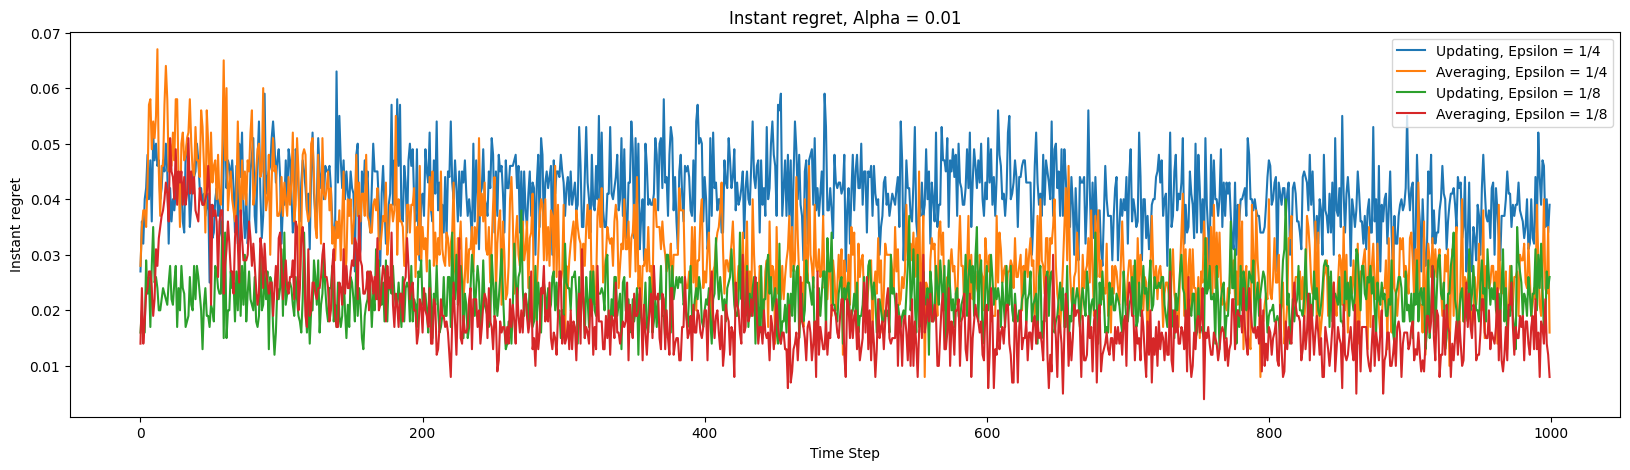

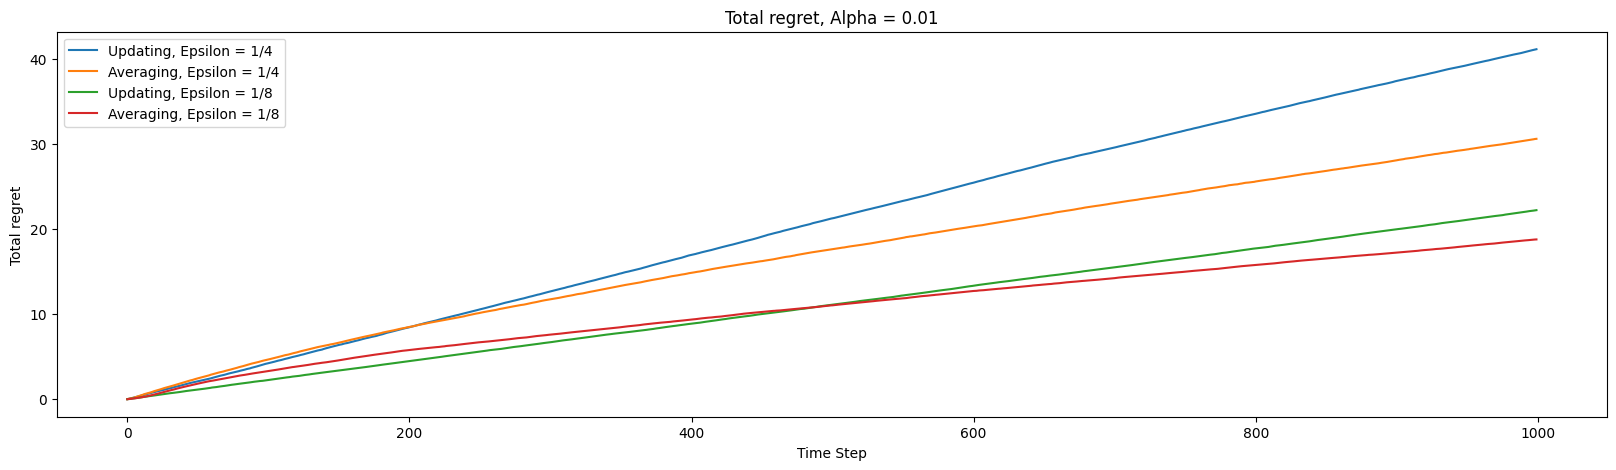

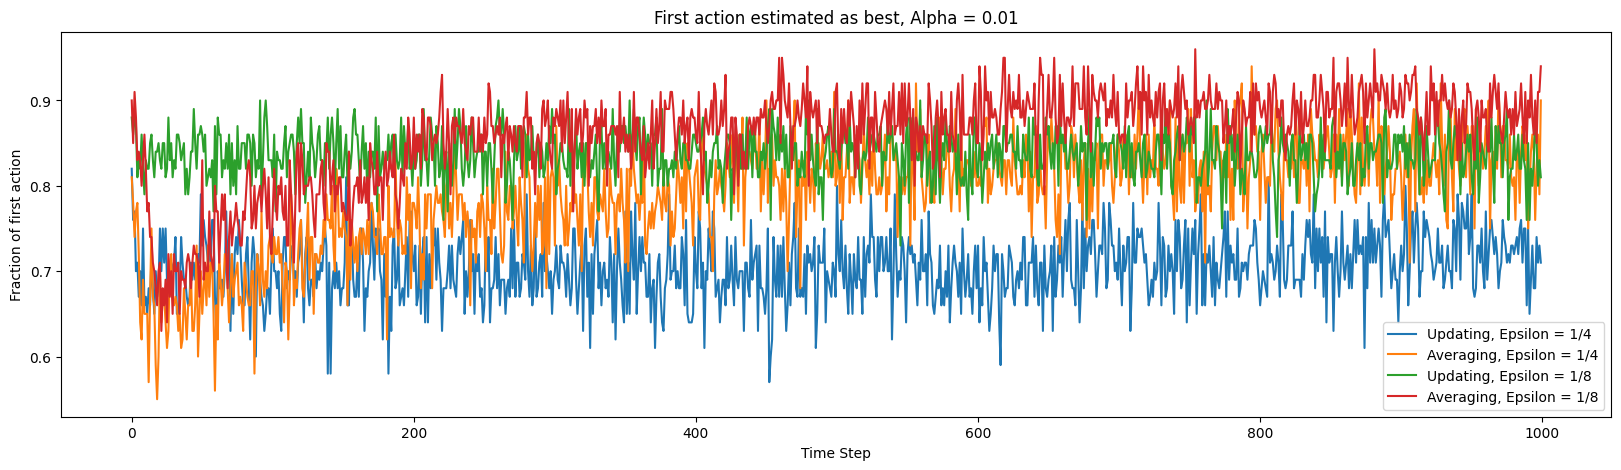

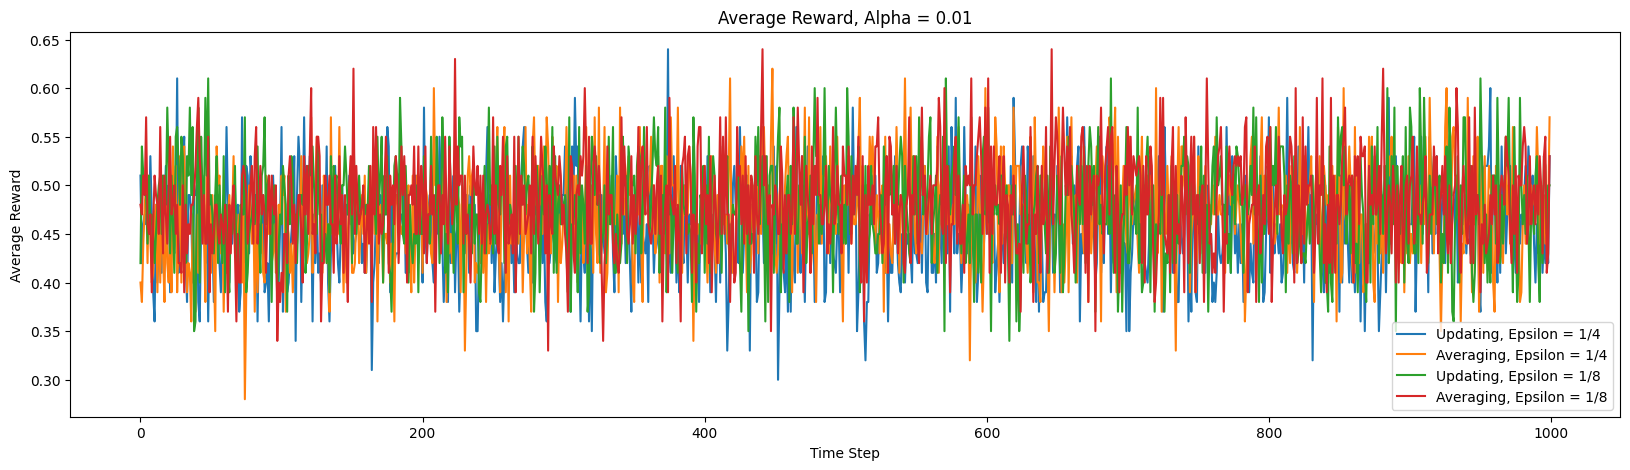

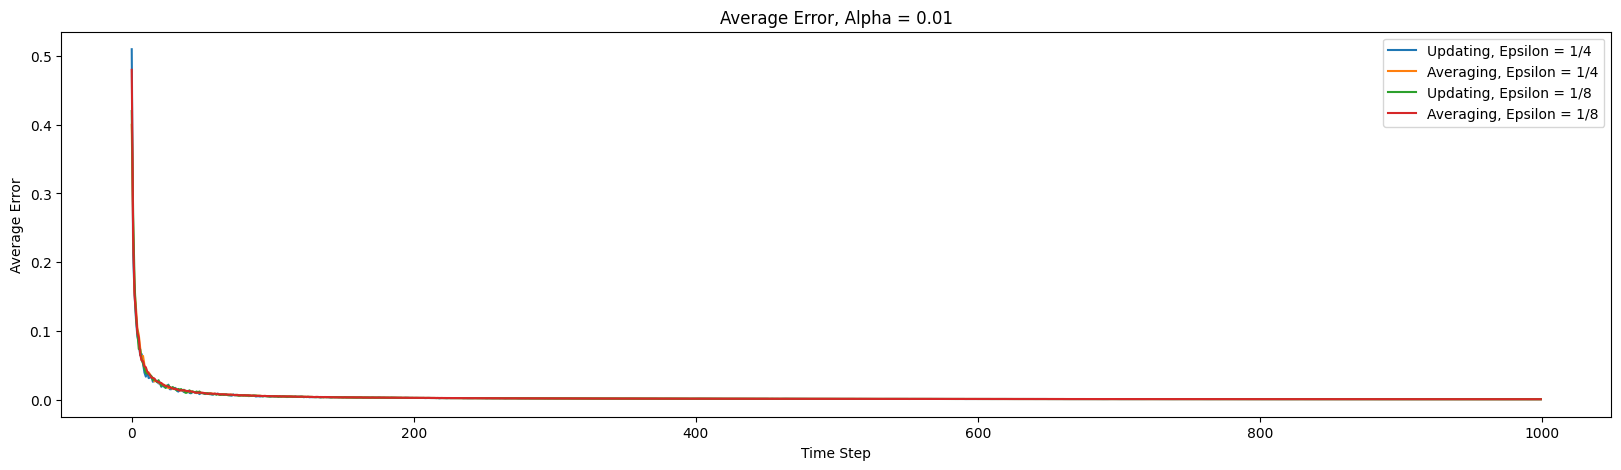

In [ ]:
alpha = 0.01
for i in range(num_runs):
    bandit_511 = Bernoullibandit(p=p,p_i=p_i)
    bandit_512 = Bernoullibandit(p=p,p_i=p_i)
    bandit_521 = Bernoullibandit(p=p,p_i=p_i)
    bandit_522 = Bernoullibandit(p=p,p_i=p_i)
    for j in range(num_timestep):
        action11 = (bandit_511.epsilon_greedy(epsilon=(1/4)))
        action12 = (bandit_512.epsilon_greedy(epsilon=(1/4)))
        action21 = (bandit_521.epsilon_greedy(epsilon=(1/8)))
        action22 = (bandit_522.epsilon_greedy(epsilon=(1/8)))
        action_11[i,j] = action11
        action_12[i,j] = action12
        action_21[i,j] = action21
        action_22[i,j] = action22
        reward_11[i,j] = bandit_511.sample(int(action11))
        reward_12[i,j] = bandit_512.sample(int(action12))
        reward_21[i,j] = bandit_521.sample(int(action21))
        reward_22[i,j] = bandit_522.sample(int(action22))
        error_11[i,j] = abs(bandit_511.std_error(action11, reward_11[i,j], j+1))
        error_12[i,j] = abs(bandit_512.std_error(action12, reward_12[i,j], j+1))
        error_21[i,j] = abs(bandit_521.std_error(action21, reward_21[i,j], j+1))
        error_22[i,j] = abs(bandit_522.std_error(action22, reward_22[i,j], j+1))
        regret_11[i,j] = p[np.argmax(p)] - p[action_11[i,j]]
        regret_12[i,j] = p[np.argmax(p)] - p[action_12[i,j]]
        regret_21[i,j] = p[np.argmax(p)] - p[action_21[i,j]]
        regret_22[i,j] = p[np.argmax(p)] - p[action_22[i,j]]
        bandit_521.update(action_21[i,j], reward_21[i,j], alpha = 0.01)
        bandit_511.update(action_11[i,j], reward_11[i,j], alpha = 0.01)
        bandit_522.updateAvg(action_22[i,j], reward_22[i,j])
        bandit_512.updateAvg(action_12[i,j], reward_12[i,j])

        
avg_reward11 = np.mean(reward_11, axis=0)
avg_reward12 = np.mean(reward_12, axis=0)
avg_reward21 = np.mean(reward_21, axis=0)  
avg_reward22 = np.mean(reward_22, axis=0)     
avg_error11 = np.mean(error_11, axis=0)
avg_error12 = np.mean(error_12, axis=0)
avg_error21 = np.mean(error_21, axis=0)
avg_error22 = np.mean(error_22, axis=0)
instant_regret_11 = np.mean(regret_11, axis=0)
instant_regret_12 = np.mean(regret_12, axis=0)
instant_regret_21 = np.mean(regret_21, axis=0)
instant_regret_22 = np.mean(regret_22, axis=0)
first_fraction_11 = bandit_511.first_fraction(num_runs, num_timestep, action_11)
first_fraction_12 = bandit_512.first_fraction(num_runs, num_timestep, action_12)
first_fraction_21 = bandit_521.first_fraction(num_runs, num_timestep, action_21)
first_fraction_22 = bandit_522.first_fraction(num_runs, num_timestep, action_22)
total_regret_11 = np.cumsum(instant_regret_11)
total_regret_12 = np.cumsum(instant_regret_12)
total_regret_21 = np.cumsum(instant_regret_21)
total_regret_22 = np.cumsum(instant_regret_22)

#plot fraction of the first action taken
plt.figure(figsize=[20,5])
plt.title("Instant regret, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), instant_regret_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), instant_regret_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), instant_regret_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()
#Instant regret
plt.figure(figsize=[20,5])
plt.title("Total regret, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), total_regret_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), total_regret_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), total_regret_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()
#Fraction of first move
plt.figure(figsize=[20,5])
plt.title("First action estimated as best, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), first_fraction_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), first_fraction_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), first_fraction_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Reward, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_reward12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_reward21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), avg_reward22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Error, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Average Error")
plt.plot(range(num_timestep), avg_error11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_error12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_error21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), avg_error22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

In [ ]:
reward_11 = np.zeros((num_runs, num_timestep))
reward_12 = np.zeros((num_runs, num_timestep))
reward_21 = np.zeros((num_runs, num_timestep))
reward_22 = np.zeros((num_runs, num_timestep))
action_11 = np.zeros((num_runs, num_timestep), dtype = int)
action_12 = np.zeros((num_runs, num_timestep), dtype = int)
regret_11 = np.zeros((num_runs, num_timestep))
regret_12 = np.zeros((num_runs, num_timestep))
reward_21 = np.zeros((num_runs, num_timestep))
reward_22 = np.zeros((num_runs, num_timestep))
action_21 = np.zeros((num_runs, num_timestep), dtype = int)
action_22 = np.zeros((num_runs, num_timestep), dtype = int)
regret_21 = np.zeros((num_runs, num_timestep))
regret_22 = np.zeros((num_runs, num_timestep))
error_11 = np.zeros((num_runs, num_timestep))
error_12 = np.zeros((num_runs, num_timestep))
error_21 = np.zeros((num_runs, num_timestep))
error_22 = np.zeros((num_runs, num_timestep))
delta = 0.1
p = [0.5, 0.5-delta, 0.5-2*delta]
p_i = 0.0


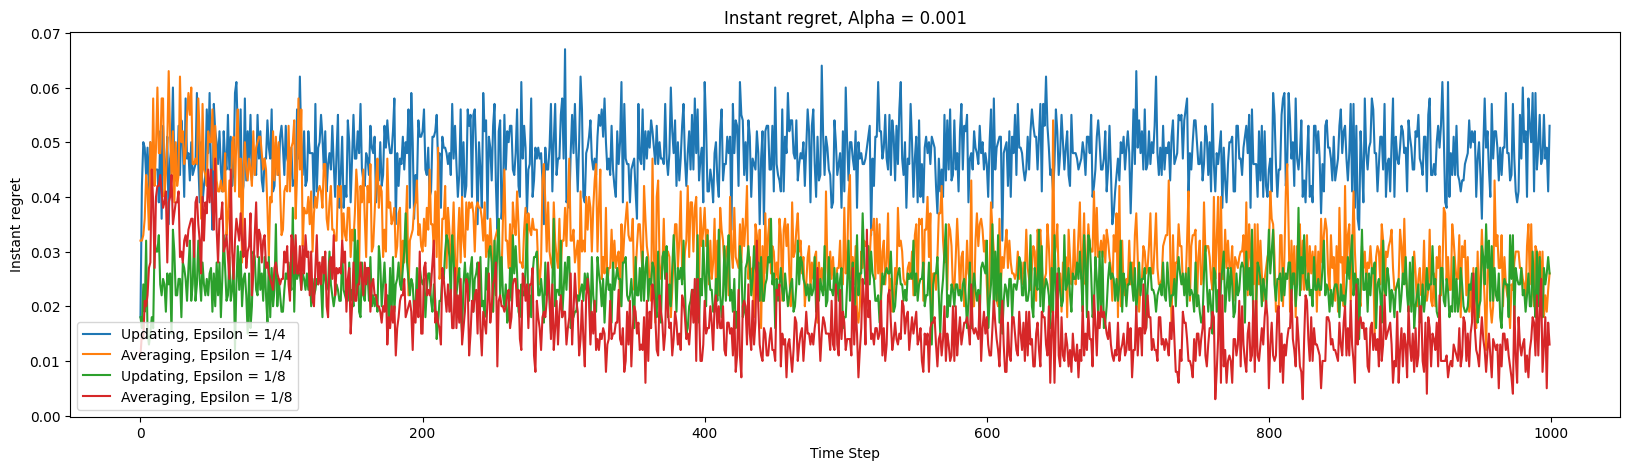

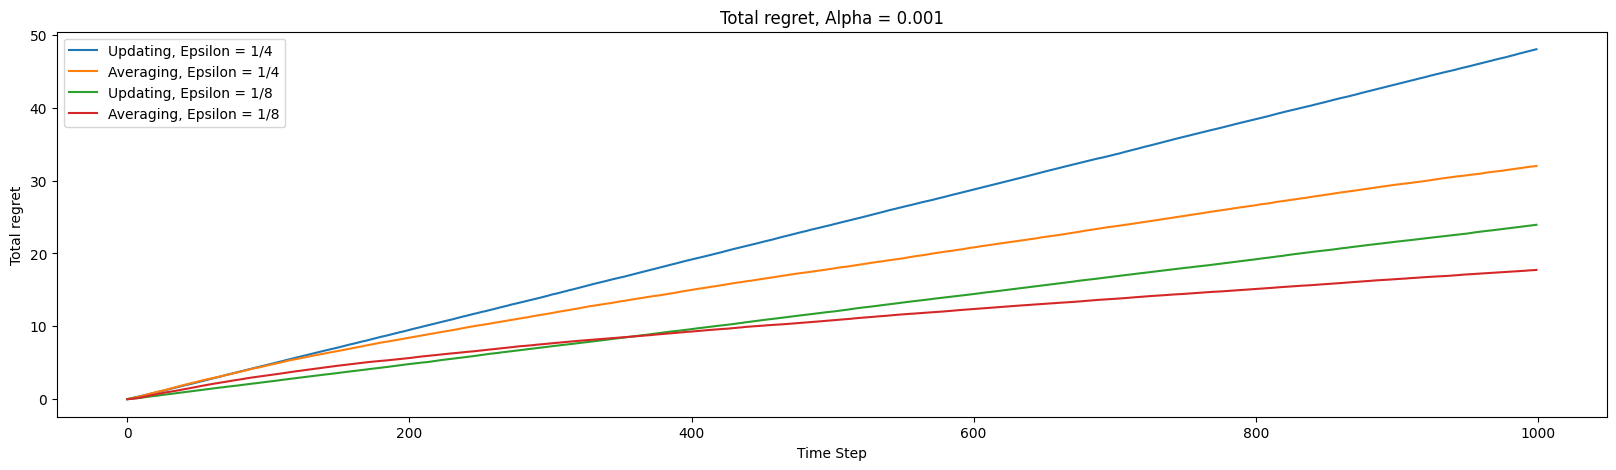

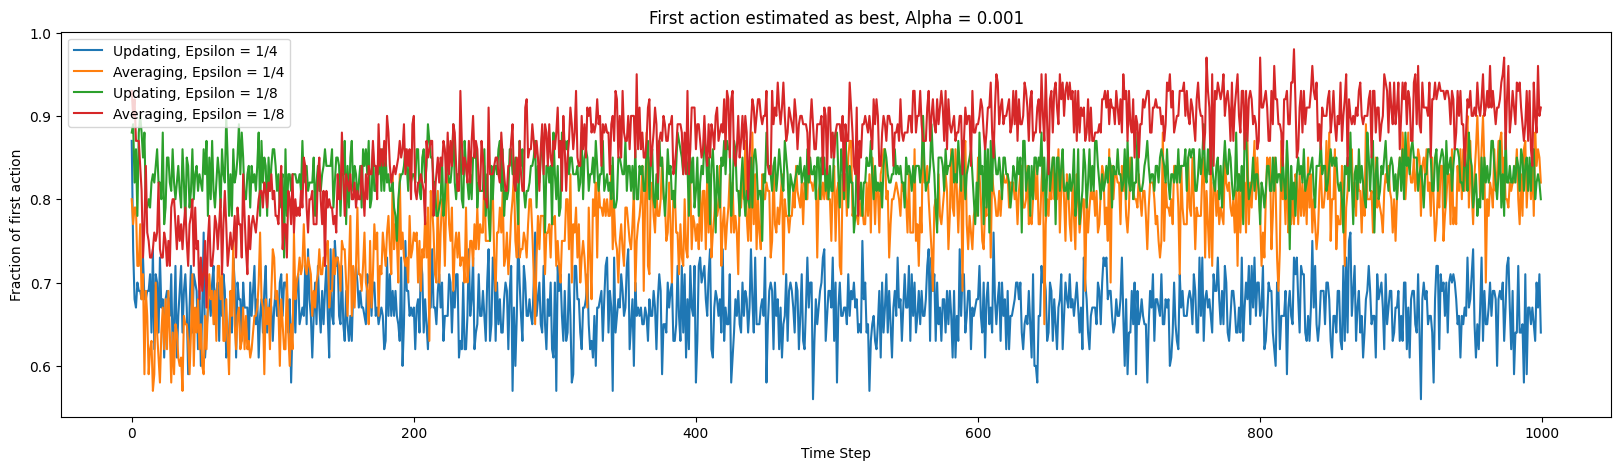

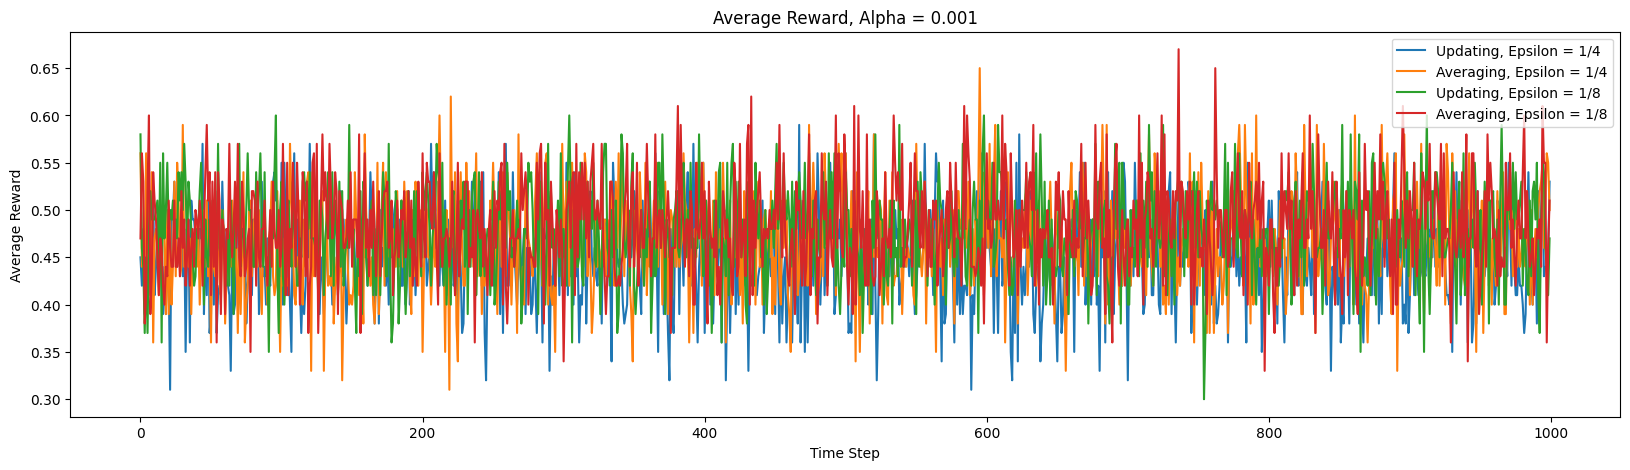

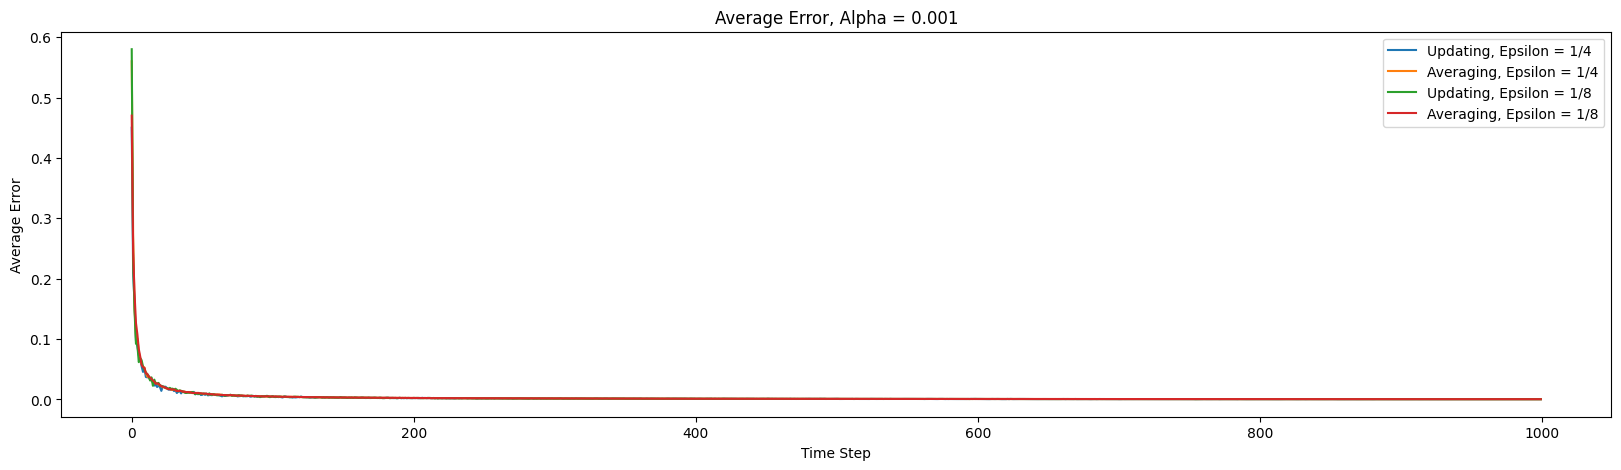

In [ ]:
alpha = 0.001
for i in range(num_runs):
    bandit_511 = Bernoullibandit(p=p,p_i=p_i)
    bandit_512 = Bernoullibandit(p=p,p_i=p_i)
    bandit_521 = Bernoullibandit(p=p,p_i=p_i)
    bandit_522 = Bernoullibandit(p=p,p_i=p_i)
    for j in range(num_timestep):
        action11 = (bandit_511.epsilon_greedy(epsilon=(1/4)))
        action12 = (bandit_512.epsilon_greedy(epsilon=(1/4)))
        action21 = (bandit_521.epsilon_greedy(epsilon=(1/8)))
        action22 = (bandit_522.epsilon_greedy(epsilon=(1/8)))
        action_11[i,j] = action11
        action_12[i,j] = action12
        action_21[i,j] = action21
        action_22[i,j] = action22
        reward_11[i,j] = bandit_511.sample(int(action11))
        reward_12[i,j] = bandit_512.sample(int(action12))
        reward_21[i,j] = bandit_521.sample(int(action21))
        reward_22[i,j] = bandit_522.sample(int(action22))
        error_11[i,j] = abs(bandit_511.std_error(action11, reward_11[i,j], j+1))
        error_12[i,j] = abs(bandit_512.std_error(action12, reward_12[i,j], j+1))
        error_21[i,j] = abs(bandit_521.std_error(action21, reward_21[i,j], j+1))
        error_22[i,j] = abs(bandit_522.std_error(action22, reward_22[i,j], j+1))
        regret_11[i,j] = p[np.argmax(p)] - p[action_11[i,j]]
        regret_12[i,j] = p[np.argmax(p)] - p[action_12[i,j]]
        regret_21[i,j] = p[np.argmax(p)] - p[action_21[i,j]]
        regret_22[i,j] = p[np.argmax(p)] - p[action_22[i,j]]
        bandit_521.update(action_21[i,j], reward_21[i,j], alpha = 0.001)
        bandit_511.update(action_11[i,j], reward_11[i,j], alpha = 0.001)
        bandit_522.updateAvg(action_22[i,j], reward_22[i,j])
        bandit_512.updateAvg(action_12[i,j], reward_12[i,j])

        
avg_reward11 = np.mean(reward_11, axis=0)
avg_reward12 = np.mean(reward_12, axis=0)
avg_reward21 = np.mean(reward_21, axis=0)  
avg_reward22 = np.mean(reward_22, axis=0)     
avg_error11 = np.mean(error_11, axis=0)
avg_error12 = np.mean(error_12, axis=0)
avg_error21 = np.mean(error_21, axis=0)
avg_error22 = np.mean(error_22, axis=0)
instant_regret_11 = np.mean(regret_11, axis=0)
instant_regret_12 = np.mean(regret_12, axis=0)
instant_regret_21 = np.mean(regret_21, axis=0)
instant_regret_22 = np.mean(regret_22, axis=0)
first_fraction_11 = bandit_511.first_fraction(num_runs, num_timestep, action_11)
first_fraction_12 = bandit_512.first_fraction(num_runs, num_timestep, action_12)
first_fraction_21 = bandit_521.first_fraction(num_runs, num_timestep, action_21)
first_fraction_22 = bandit_522.first_fraction(num_runs, num_timestep, action_22)
total_regret_11 = np.cumsum(instant_regret_11)
total_regret_12 = np.cumsum(instant_regret_12)
total_regret_21 = np.cumsum(instant_regret_21)
total_regret_22 = np.cumsum(instant_regret_22)

#plot fraction of the first action taken
plt.figure(figsize=[20,5])
plt.title("Instant regret, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), instant_regret_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), instant_regret_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), instant_regret_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()
#Instant regret
plt.figure(figsize=[20,5])
plt.title("Total regret, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), total_regret_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), total_regret_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), total_regret_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()
#Fraction of first move
plt.figure(figsize=[20,5])
plt.title("First action estimated as best, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), first_fraction_12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), first_fraction_21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), first_fraction_22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Reward, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_reward12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_reward21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), avg_reward22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Error, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Average Error")
plt.plot(range(num_timestep), avg_error11, label="Updating, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_error12, label="Averaging, Epsilon = 1/4")
plt.plot(range(num_timestep), avg_error21, label="Updating, Epsilon = 1/8")
plt.plot(range(num_timestep), avg_error22, label="Averaging, Epsilon = 1/8")
plt.legend()
plt.show()

In [ ]:
reward_11 = np.zeros((num_runs, num_timestep))
reward_12 = np.zeros((num_runs, num_timestep))
action_11 = np.zeros((num_runs, num_timestep), dtype = int)
action_12 = np.zeros((num_runs, num_timestep), dtype = int)
regret_11 = np.zeros((num_runs, num_timestep))
regret_12 = np.zeros((num_runs, num_timestep))
reward_2 = np.zeros((num_runs, num_timestep))
action_2 = np.zeros((num_runs, num_timestep), dtype = int)
regret_2 = np.zeros((num_runs, num_timestep))
delta = 0.1
p = [0.5, 0.5-delta, 0.5-2*delta]
p_i = 0.0

#Q6

In upper confidence bound algorithm, initially, AI would try to do more exploration compared to other algorithms. As a result, AI would take that action more which hasn't been taken frequently, in our case AI would chose arm-3 more at the intially. As estimated rewards are being learned over time, AI would choose that arm which has highest estimated rewards, in this case arm - 1. 

## Case 1
### Alpha = 0.1

In this case averaging of the eastimated reward performs better than updating the rewards using alpha = 0.1. To decide which performs better, I've taken total regret as a metric since it gives more accurate information about the convergence of the estimated rewards to the true rewards compared to average rewards data. In the case of average reward, we can see that the variance if very high and it is very difficult to observe the trend. However, in the case of total regret, we can see that the trend is very clear. Our main goal is to maximize the total rewards at the same time minimize the total regret.
 

## Case 2
### Alpha = 0.01

As we decrease the learning rate from 0.1 to 0.01, the variance of the estimated rewards decreases. As a result, updating the estimated rewards performs better in all metric compared to averaging, in this case, total regret is very low compared to averaging. However, if we comapare our results from question 3, where it just run for 100 timesteps, here we run the experiment for 1000 time steps. In conclusion, using more timesteps with lower learning rate performs better than using less timesteps with higher learning rate.

## Case 3
### Alpha = 0.001

For the analysis of the results, I've consider fraction of times arm - 1 was chosen compared to the other arms. Since, at alpha = 0.001, AI performs the best compared to other alpha values. As the estimatation of rewards converges to true value of rewards, fraction of arm - 1 chosen increases to nearly 1. This shows that having more number of timesteps can give nearly optimal results compared to averaging of the estimated rewards.  

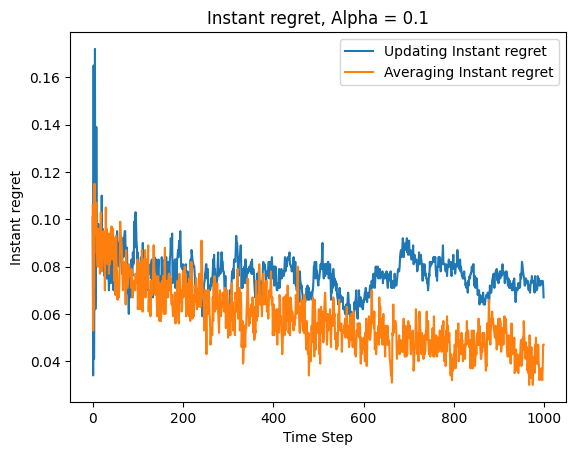

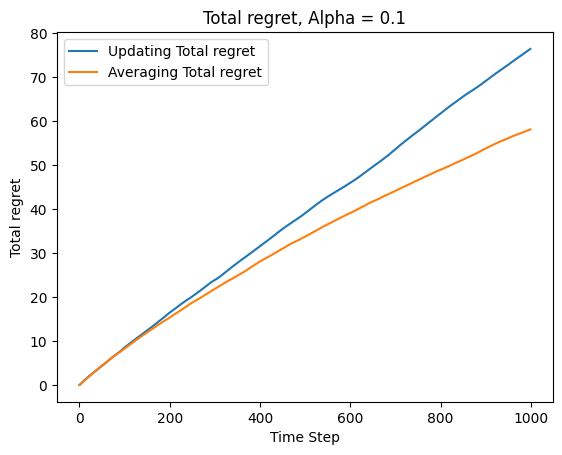

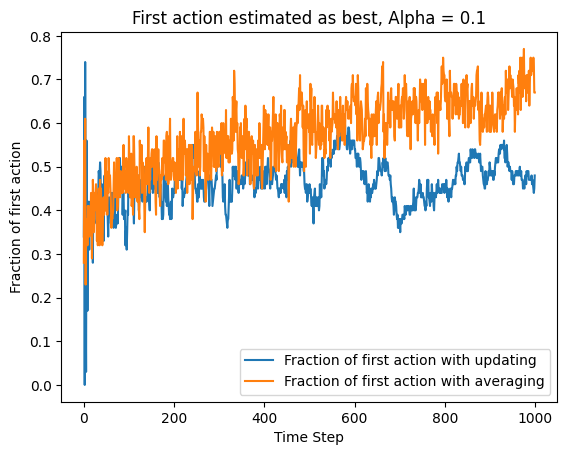

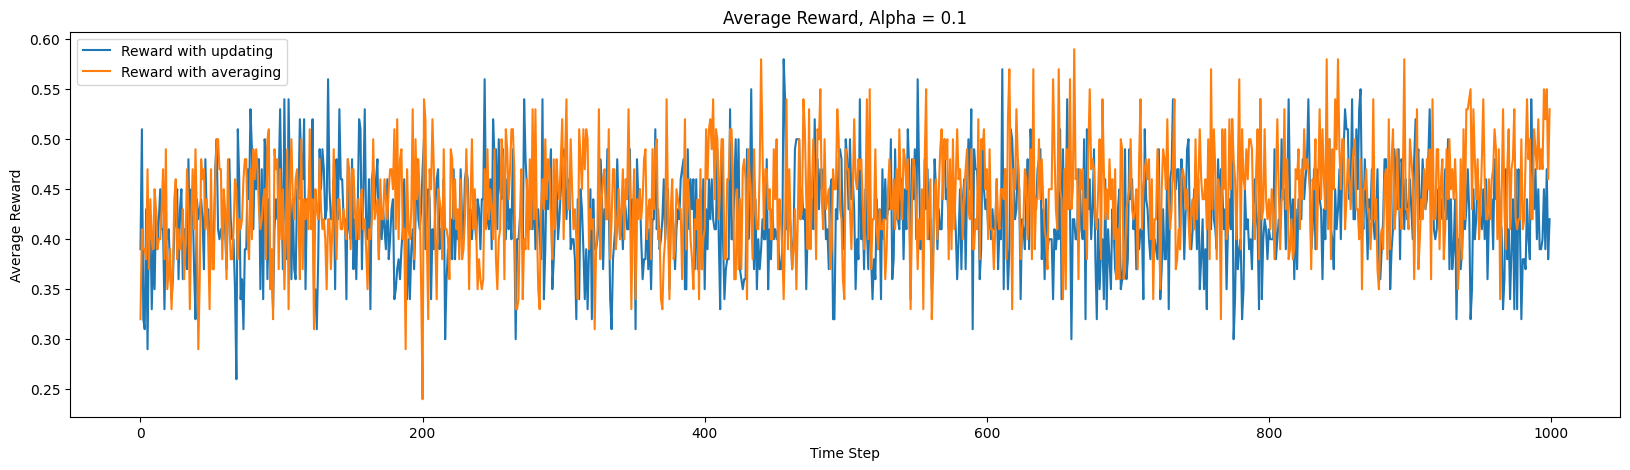

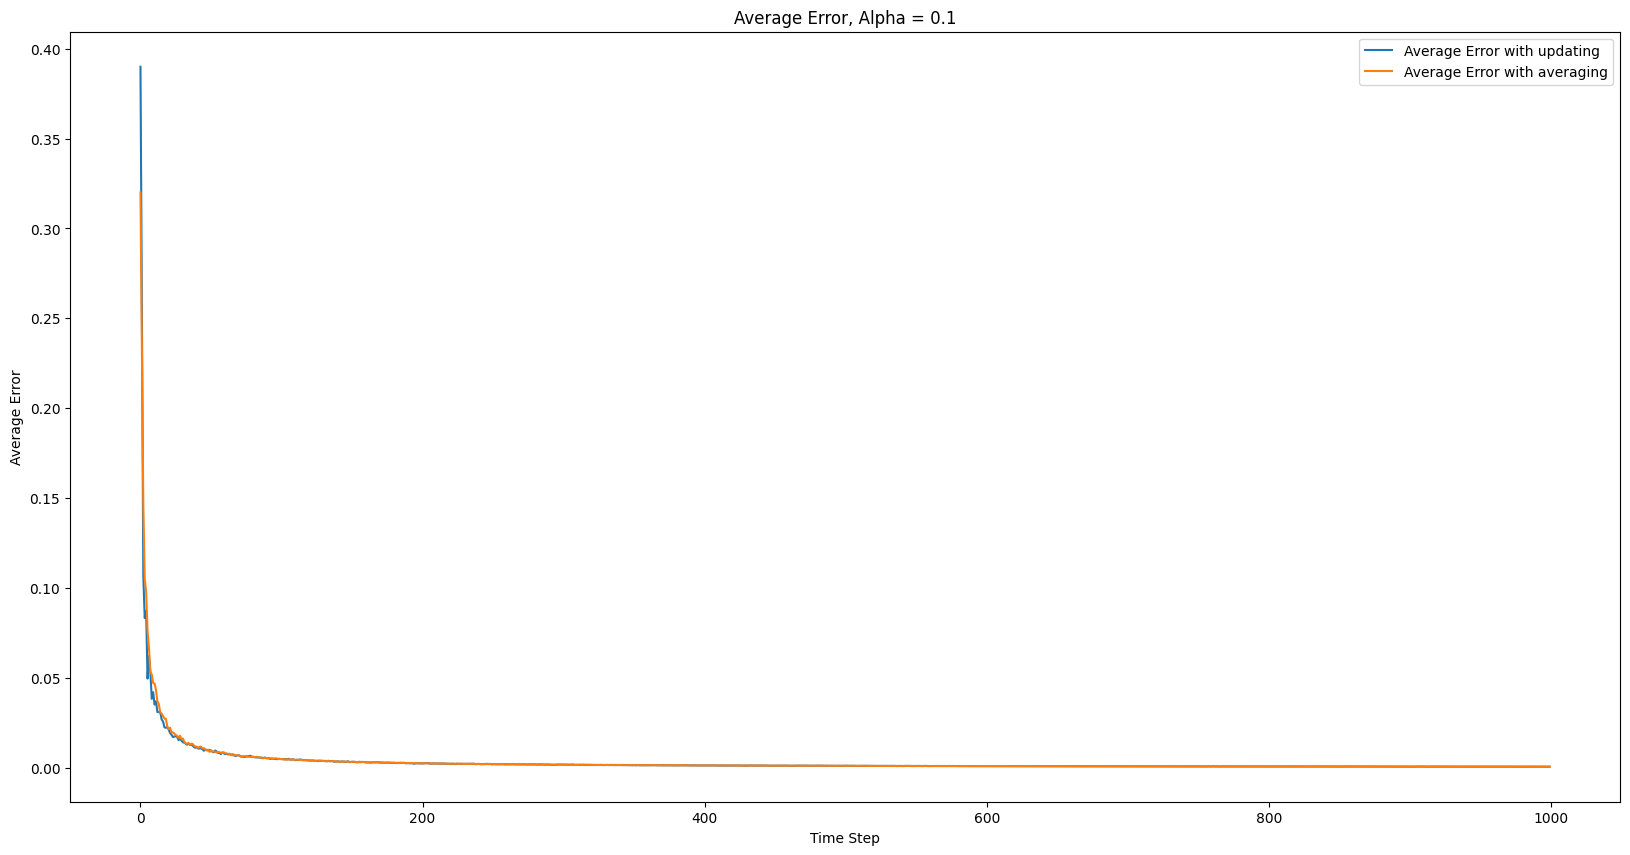

In [ ]:
#Question 6
c = 2
alpha = 0.1
# alpha = 0.001
for i in range(num_runs):
    bandit_611 = Bernoullibandit(p=p,p_i=0)
    bandit_612 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        action11 = (bandit_611.ucb(c, j))
        action12 = (bandit_612.ucb(c, j))
        action_11[i,j] = action11
        action_12[i,j] = action12
        # print(bandit_61.est_p)
        # print(bandit_61.n)
        reward_11[i,j] = bandit_611.sample(int(action11))
        reward_12[i,j] = bandit_612.sample(int(action12))
        error_11[i,j] = abs(bandit_611.std_error(action11, reward_11[i,j], j+1))
        error_12[i,j] = abs(bandit_612.std_error(action12, reward_12[i,j], j+1))
        regret_11[i,j] = p[np.argmax(p)] - p[action_11[i,j]]
        regret_12[i,j] = p[np.argmax(p)] - p[action_12[i,j]]
        bandit_611.update(action_11[i,j], reward_11[i,j], alpha = 0.1)
        bandit_612.updateAvg(action_12[i,j], reward_12[i,j])
        bandit_611.n[action11] += 1
        
avg_reward11 = np.mean(reward_11, axis=0)  
avg_reward12 = np.mean(reward_12, axis=0)  
avg_error11 = np.mean(error_11, axis=0)
avg_error12 = np.mean(error_12, axis=0)
instant_regret_11 = np.mean(regret_11, axis=0)
instant_regret_12 = np.mean(regret_12, axis=0)
first_fraction_11 = bandit_611.first_fraction(num_runs, num_timestep, action_11)
first_fraction_12 = bandit_612.first_fraction(num_runs, num_timestep, action_12)
total_regret_11 = np.cumsum(instant_regret_11)
total_regret_12 = np.cumsum(instant_regret_12)

#plot fraction of the first action taken
plt.figure()
plt.title("Instant regret, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_11, label="Updating Instant regret")
plt.plot(range(num_timestep), instant_regret_12, label="Averaging Instant regret")
# plt.plot(range(num_timestep), instant_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Instant regret
plt.figure()
plt.title("Total regret, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_11, label = "Updating Total regret")
plt.plot(range(num_timestep), total_regret_12, label = "Averaging Total regret")
# plt.plot(range(num_timestep), total_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Fraction of first move
plt.figure()
plt.title("First action estimated as best, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_11, label = "Fraction of first action with updating")
plt.plot(range(num_timestep), first_fraction_12, label = "Fraction of first action with averaging")
# plt.plot(range(num_timestep), first_fraction_2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Reward, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward11, label = "Reward with updating")
plt.plot(range(num_timestep), avg_reward12, label = "Reward with averaging")
# plt.plot(range(num_timestep), avg_reward2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,10])
plt.title("Average Error, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Average Error")
plt.plot(range(num_timestep), avg_error11, label = "Average Error with updating")
plt.plot(range(num_timestep), avg_error12, label = "Average Error with averaging")
# plt.plot(range(num_timestep), avg_error2, label="Epsilon = 1/8")
plt.legend()
plt.show()


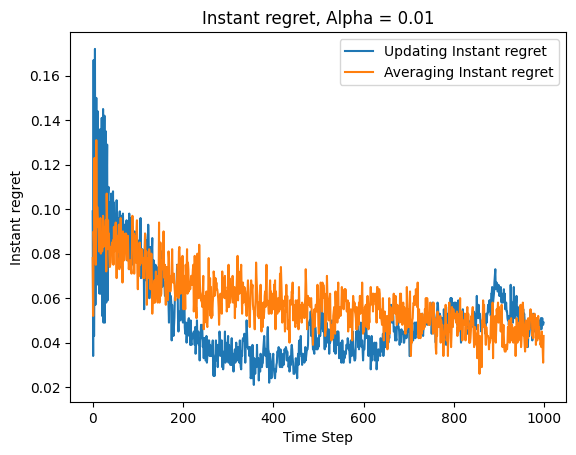

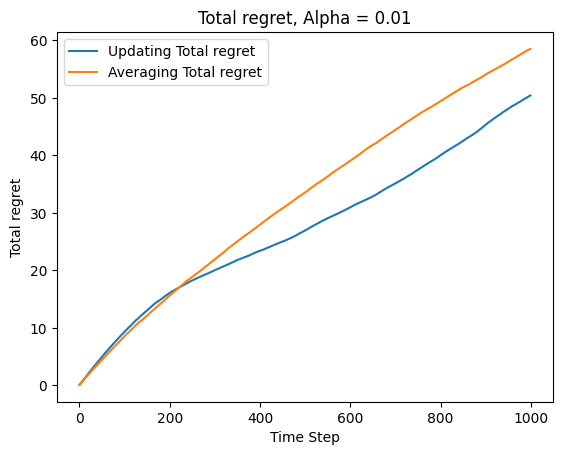

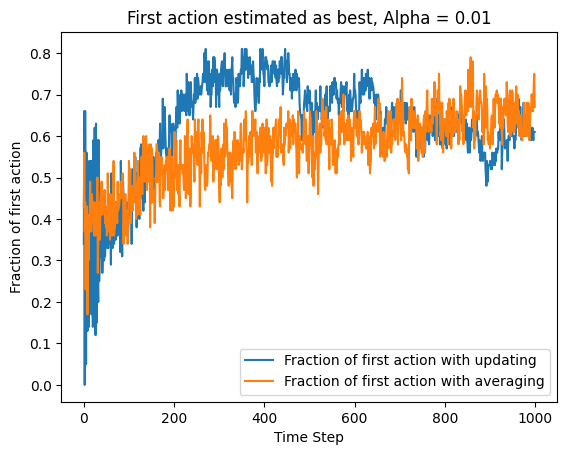

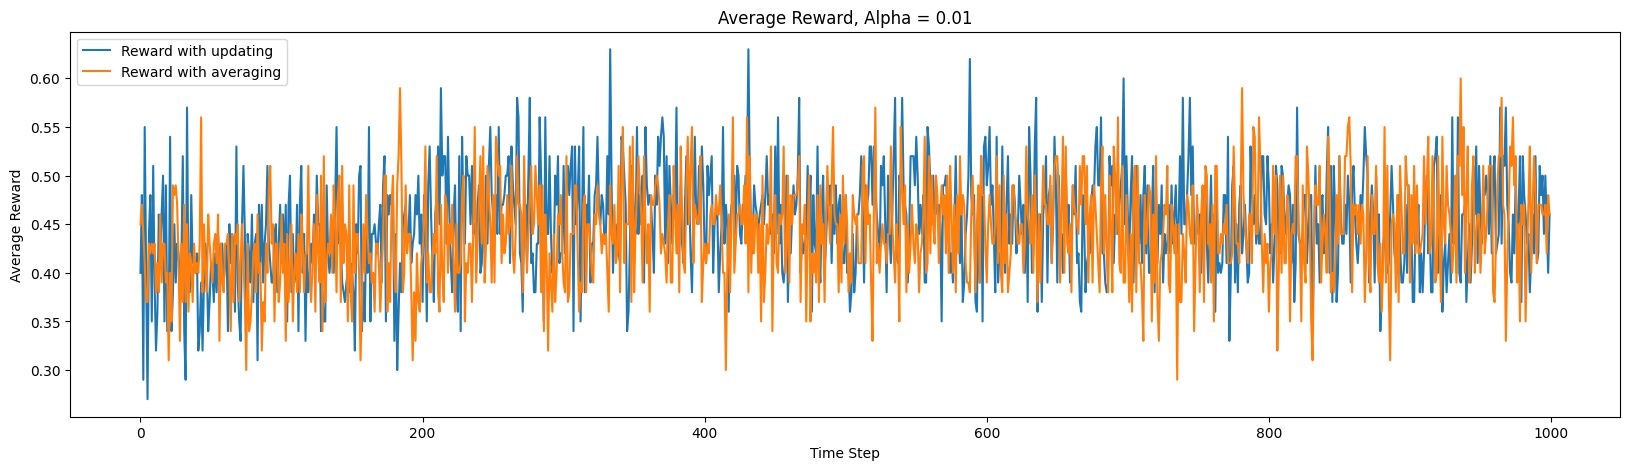

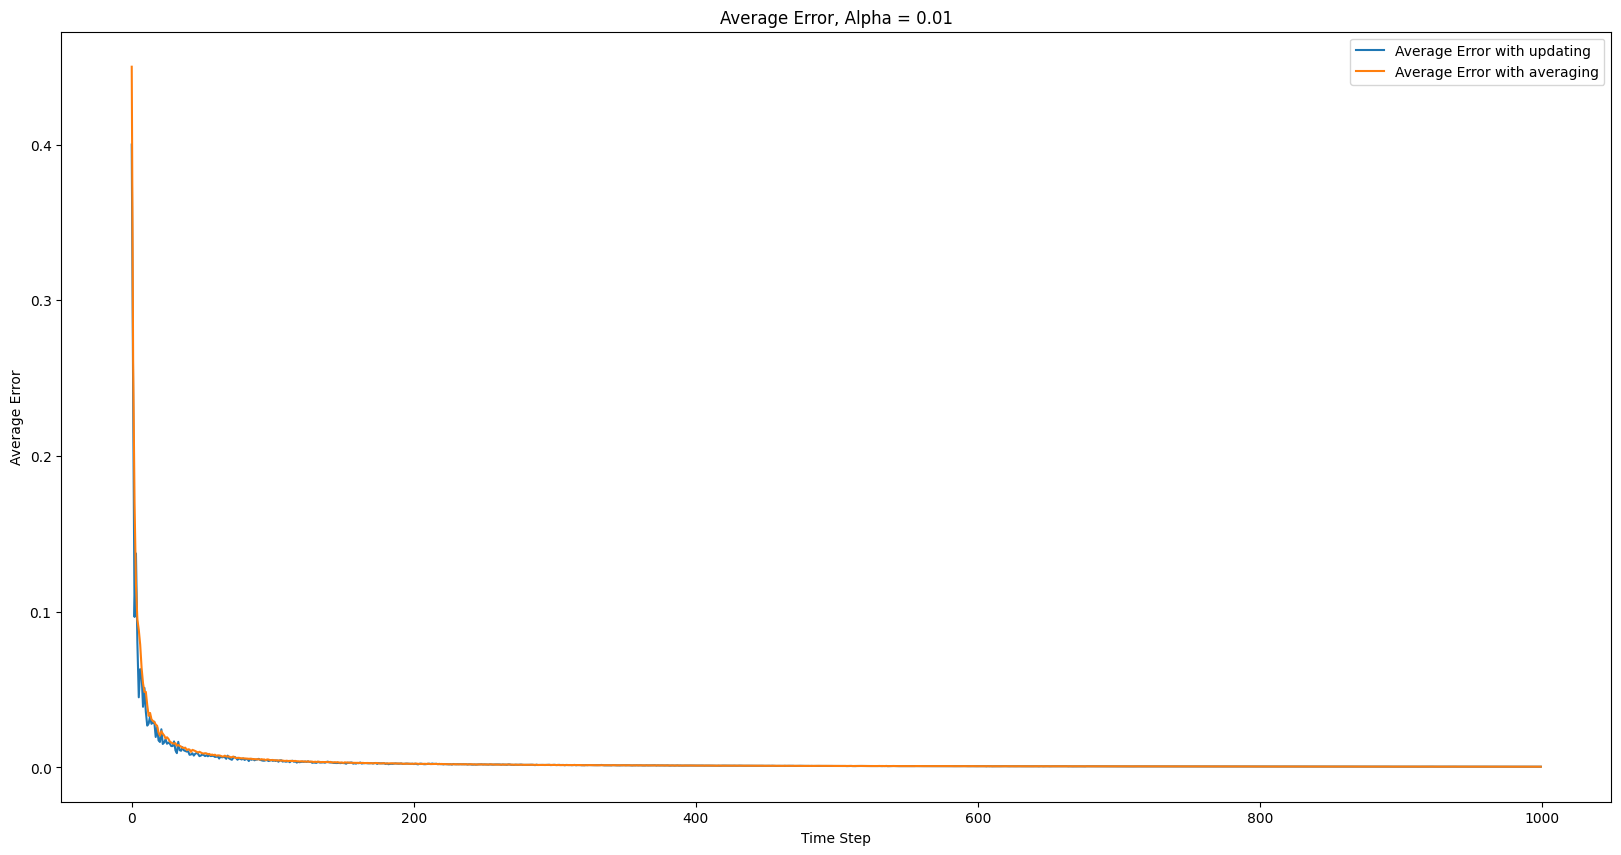

In [ ]:
reward_11 = np.zeros((num_runs, num_timestep))
reward_12 = np.zeros((num_runs, num_timestep))
action_11 = np.zeros((num_runs, num_timestep), dtype = int)
action_12 = np.zeros((num_runs, num_timestep), dtype = int)
regret_11 = np.zeros((num_runs, num_timestep))
regret_12 = np.zeros((num_runs, num_timestep))
reward_2 = np.zeros((num_runs, num_timestep))
action_2 = np.zeros((num_runs, num_timestep), dtype = int)
regret_2 = np.zeros((num_runs, num_timestep))
delta = 0.1
p = [0.5, 0.5-delta, 0.5-2*delta]
p_i = 0.0
c = 2
alpha = 0.01
# alpha = 0.001
for i in range(num_runs):
    bandit_611 = Bernoullibandit(p=p,p_i=0)
    bandit_612 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        action11 = (bandit_611.ucb(c, j))
        action12 = (bandit_612.ucb(c, j))
        action_11[i,j] = action11
        action_12[i,j] = action12
        # print(bandit_61.est_p)
        # print(bandit_61.n)
        reward_11[i,j] = bandit_611.sample(int(action11))
        reward_12[i,j] = bandit_612.sample(int(action12))
        error_11[i,j] = abs(bandit_611.std_error(action11, reward_11[i,j], j+1))
        error_12[i,j] = abs(bandit_612.std_error(action12, reward_12[i,j], j+1))
        regret_11[i,j] = p[np.argmax(p)] - p[action_11[i,j]]
        regret_12[i,j] = p[np.argmax(p)] - p[action_12[i,j]]
        bandit_611.update(action_11[i,j], reward_11[i,j], alpha = 0.01)
        bandit_612.updateAvg(action_12[i,j], reward_12[i,j])
        bandit_611.n[action11] += 1
        
avg_reward11 = np.mean(reward_11, axis=0)  
avg_reward12 = np.mean(reward_12, axis=0)  
avg_error11 = np.mean(error_11, axis=0)
avg_error12 = np.mean(error_12, axis=0)
instant_regret_11 = np.mean(regret_11, axis=0)
instant_regret_12 = np.mean(regret_12, axis=0)
first_fraction_11 = bandit_611.first_fraction(num_runs, num_timestep, action_11)
first_fraction_12 = bandit_612.first_fraction(num_runs, num_timestep, action_12)
total_regret_11 = np.cumsum(instant_regret_11)
total_regret_12 = np.cumsum(instant_regret_12)

#plot fraction of the first action taken
plt.figure()
plt.title("Instant regret, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_11, label="Updating Instant regret")
plt.plot(range(num_timestep), instant_regret_12, label="Averaging Instant regret")
# plt.plot(range(num_timestep), instant_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Instant regret
plt.figure()
plt.title("Total regret, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_11, label = "Updating Total regret")
plt.plot(range(num_timestep), total_regret_12, label = "Averaging Total regret")
# plt.plot(range(num_timestep), total_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Fraction of first move
plt.figure()
plt.title("First action estimated as best, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_11, label = "Fraction of first action with updating")
plt.plot(range(num_timestep), first_fraction_12, label = "Fraction of first action with averaging")
# plt.plot(range(num_timestep), first_fraction_2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Reward, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward11, label = "Reward with updating")
plt.plot(range(num_timestep), avg_reward12, label = "Reward with averaging")
# plt.plot(range(num_timestep), avg_reward2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,10])
plt.title("Average Error, Alpha = 0.01")
plt.xlabel("Time Step")
plt.ylabel("Average Error")
plt.plot(range(num_timestep), avg_error11, label = "Average Error with updating")
plt.plot(range(num_timestep), avg_error12, label = "Average Error with averaging")
# plt.plot(range(num_timestep), avg_error2, label="Epsilon = 1/8")
plt.legend()
plt.show()


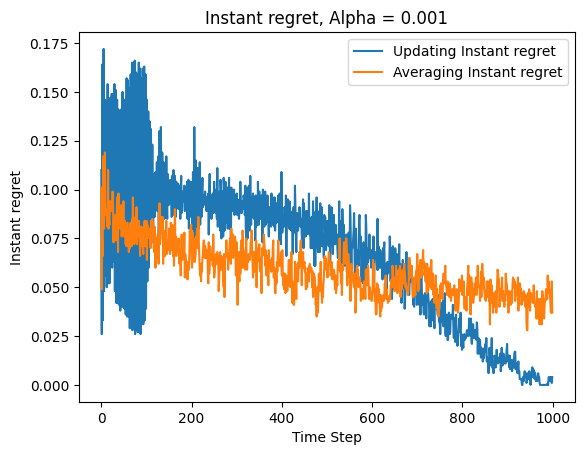

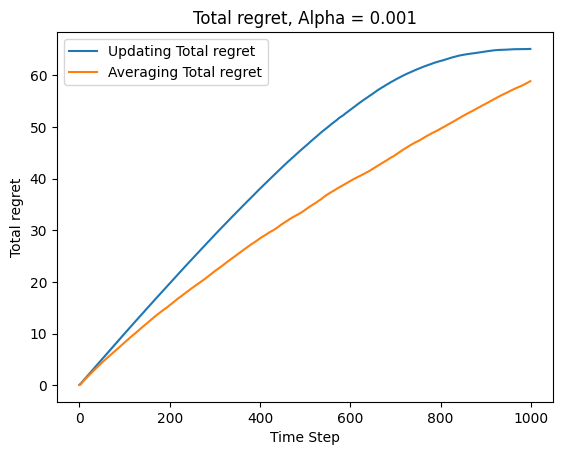

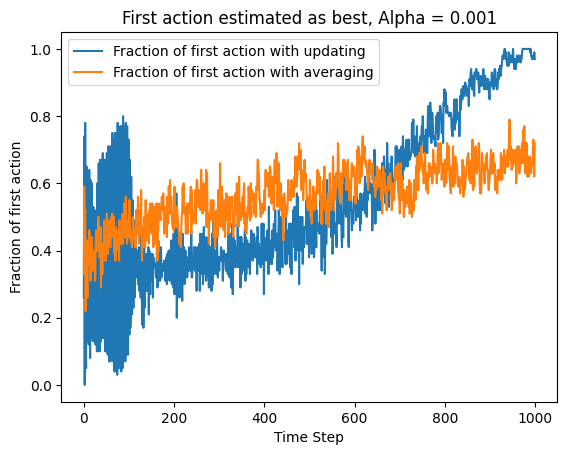

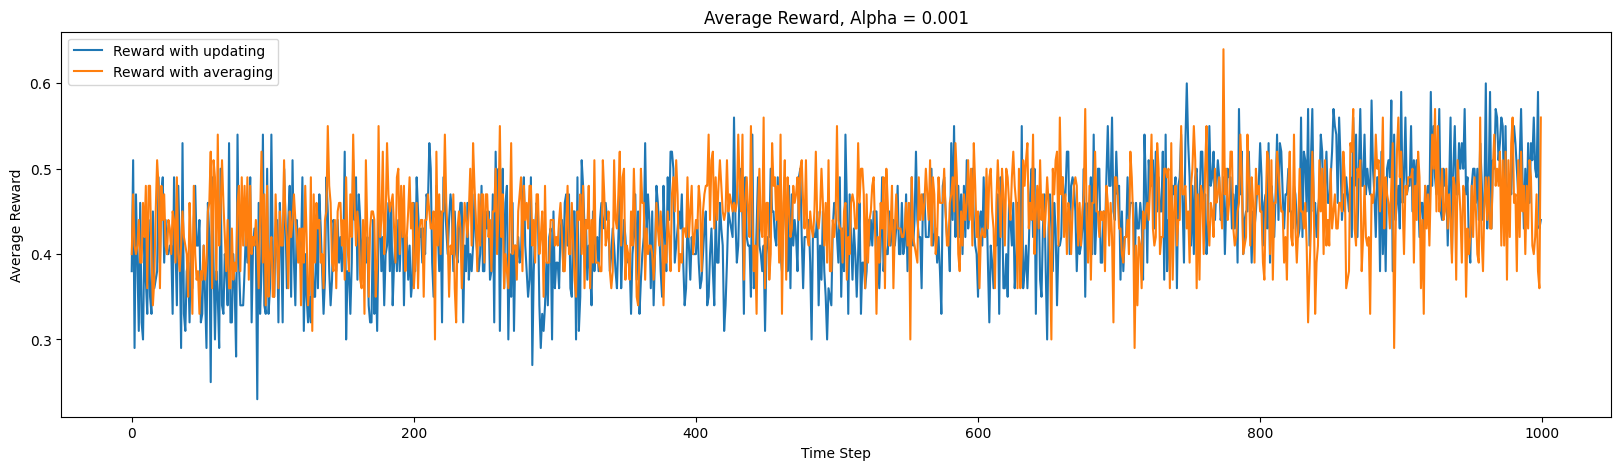

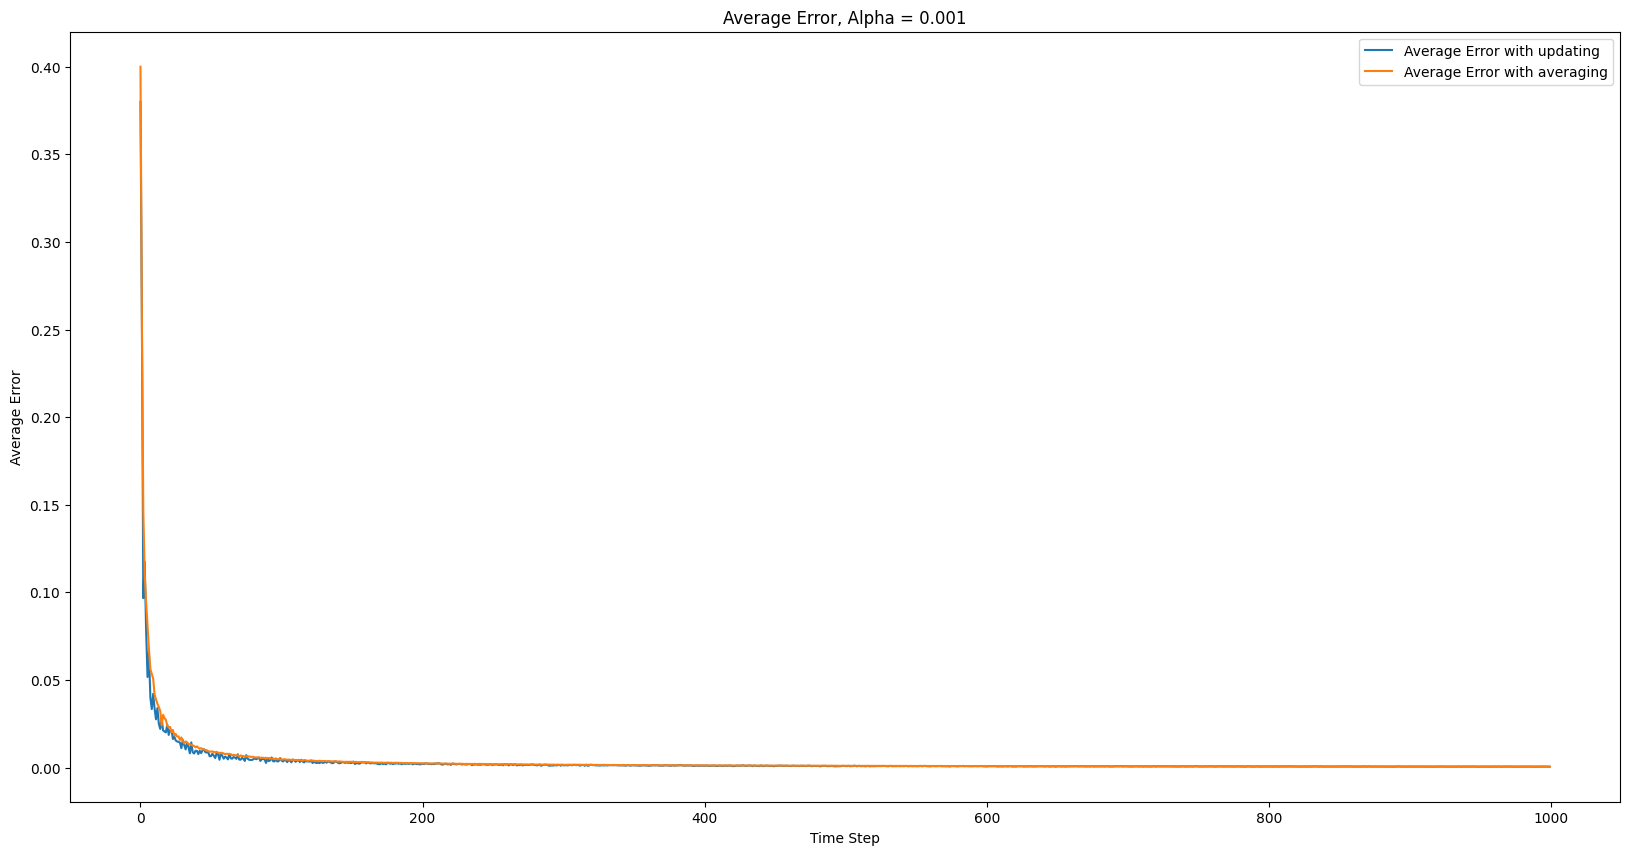

In [ ]:
reward_11 = np.zeros((num_runs, num_timestep))
reward_12 = np.zeros((num_runs, num_timestep))
action_11 = np.zeros((num_runs, num_timestep), dtype = int)
action_12 = np.zeros((num_runs, num_timestep), dtype = int)
regret_11 = np.zeros((num_runs, num_timestep))
regret_12 = np.zeros((num_runs, num_timestep))
reward_2 = np.zeros((num_runs, num_timestep))
action_2 = np.zeros((num_runs, num_timestep), dtype = int)
regret_2 = np.zeros((num_runs, num_timestep))
delta = 0.1
p = [0.5, 0.5-delta, 0.5-2*delta]
p_i = 0.0
c = 2
alpha = 0.001
# alpha = 0.001
for i in range(num_runs):
    bandit_611 = Bernoullibandit(p=p,p_i=0)
    bandit_612 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        action11 = (bandit_611.ucb(c, j))
        action12 = (bandit_612.ucb(c, j))
        action_11[i,j] = action11
        action_12[i,j] = action12
        # print(bandit_61.est_p)
        # print(bandit_61.n)
        reward_11[i,j] = bandit_611.sample(int(action11))
        reward_12[i,j] = bandit_612.sample(int(action12))
        error_11[i,j] = abs(bandit_611.std_error(action11, reward_11[i,j], j+1))
        error_12[i,j] = abs(bandit_612.std_error(action12, reward_12[i,j], j+1))
        regret_11[i,j] = p[np.argmax(p)] - p[action_11[i,j]]
        regret_12[i,j] = p[np.argmax(p)] - p[action_12[i,j]]
        bandit_611.update(action_11[i,j], reward_11[i,j], alpha = 0.001)
        bandit_612.updateAvg(action_12[i,j], reward_12[i,j])
        bandit_611.n[action11] += 1
        
avg_reward11 = np.mean(reward_11, axis=0)  
avg_reward12 = np.mean(reward_12, axis=0)  
avg_error11 = np.mean(error_11, axis=0)
avg_error12 = np.mean(error_12, axis=0)
instant_regret_11 = np.mean(regret_11, axis=0)
instant_regret_12 = np.mean(regret_12, axis=0)
first_fraction_11 = bandit_611.first_fraction(num_runs, num_timestep, action_11)
first_fraction_12 = bandit_612.first_fraction(num_runs, num_timestep, action_12)
total_regret_11 = np.cumsum(instant_regret_11)
total_regret_12 = np.cumsum(instant_regret_12)

#plot fraction of the first action taken
plt.figure()
plt.title("Instant regret, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_11, label="Updating Instant regret")
plt.plot(range(num_timestep), instant_regret_12, label="Averaging Instant regret")
# plt.plot(range(num_timestep), instant_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Instant regret
plt.figure()
plt.title("Total regret, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_11, label = "Updating Total regret")
plt.plot(range(num_timestep), total_regret_12, label = "Averaging Total regret")
# plt.plot(range(num_timestep), total_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Fraction of first move
plt.figure()
plt.title("First action estimated as best, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_11, label = "Fraction of first action with updating")
plt.plot(range(num_timestep), first_fraction_12, label = "Fraction of first action with averaging")
# plt.plot(range(num_timestep), first_fraction_2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Reward, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward11, label = "Reward with updating")
plt.plot(range(num_timestep), avg_reward12, label = "Reward with averaging")
# plt.plot(range(num_timestep), avg_reward2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,10])
plt.title("Average Error, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Average Error")
plt.plot(range(num_timestep), avg_error11, label = "Average Error with updating")
plt.plot(range(num_timestep), avg_error12, label = "Average Error with averaging")
# plt.plot(range(num_timestep), avg_error2, label="Epsilon = 1/8")
plt.legend()
plt.show()


# Q7

In the case of Thomson Sampling, the success and failure of the each arm is set equally. As these values are updated, the alpha and beta values for each arms changes and it'll try to converge near to true success and failure probabilities of each arms. So far, Thomson sampling performs best compared to other algorithms since it is able to reach zero values for instantaneous regret at the same time, fraction of times arm - 1 is chosen is nearly 1 at the end of 1000 timesteps. In addition to this, it has the lowest total regret compared to other algorithms.

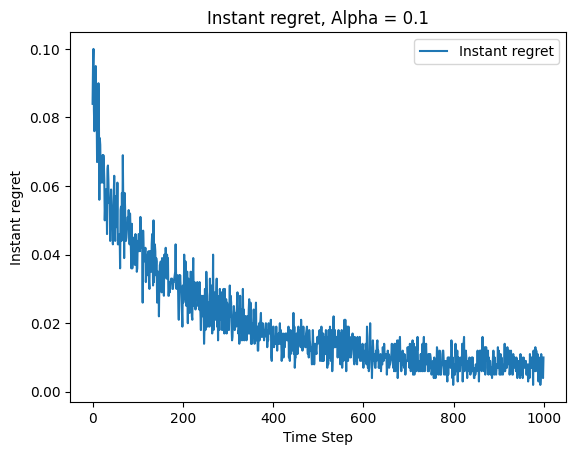

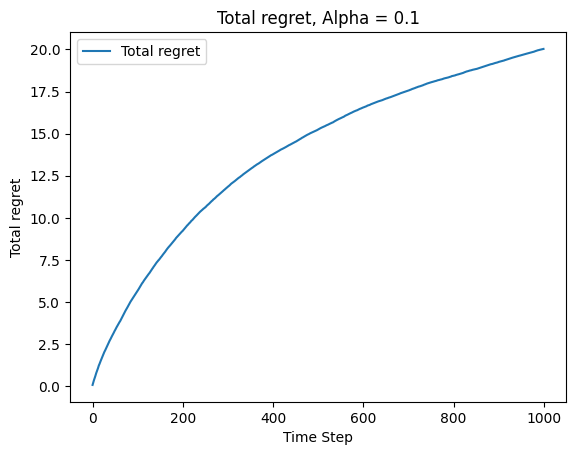

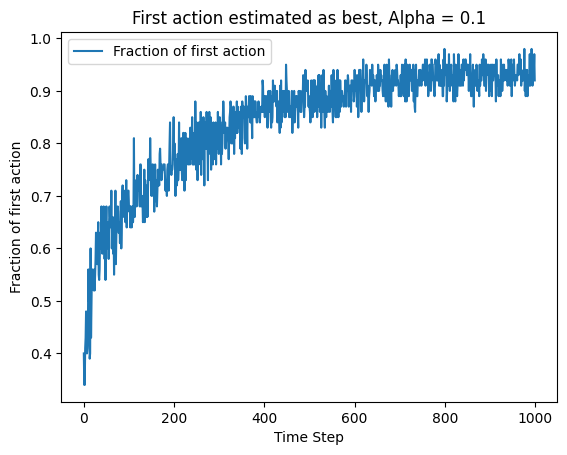

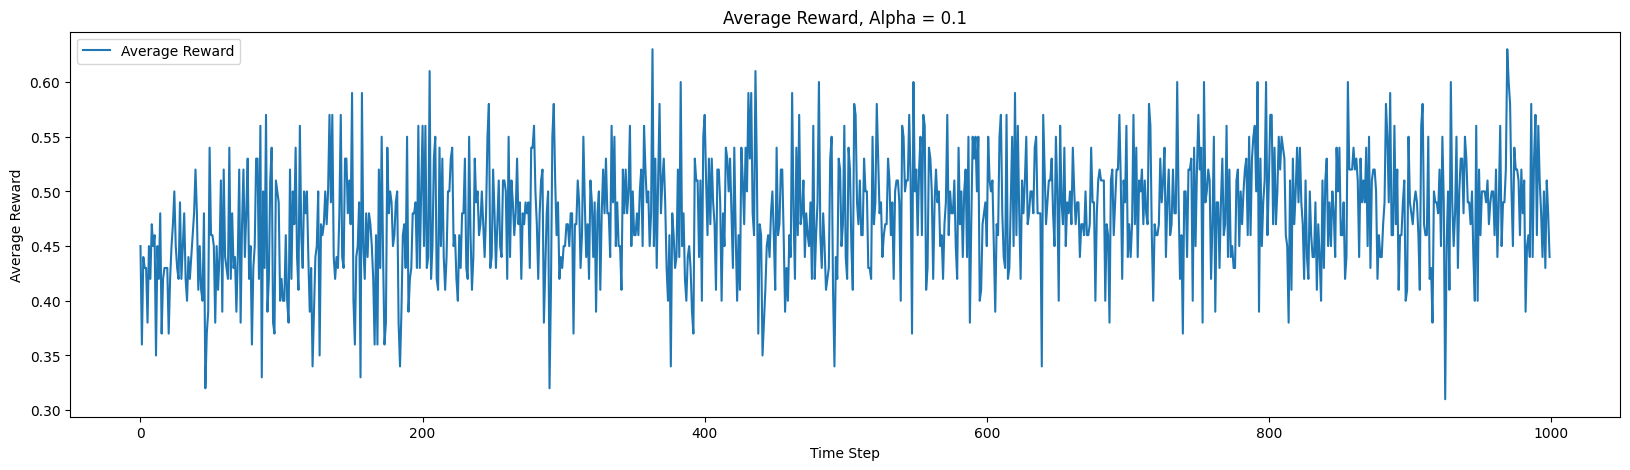

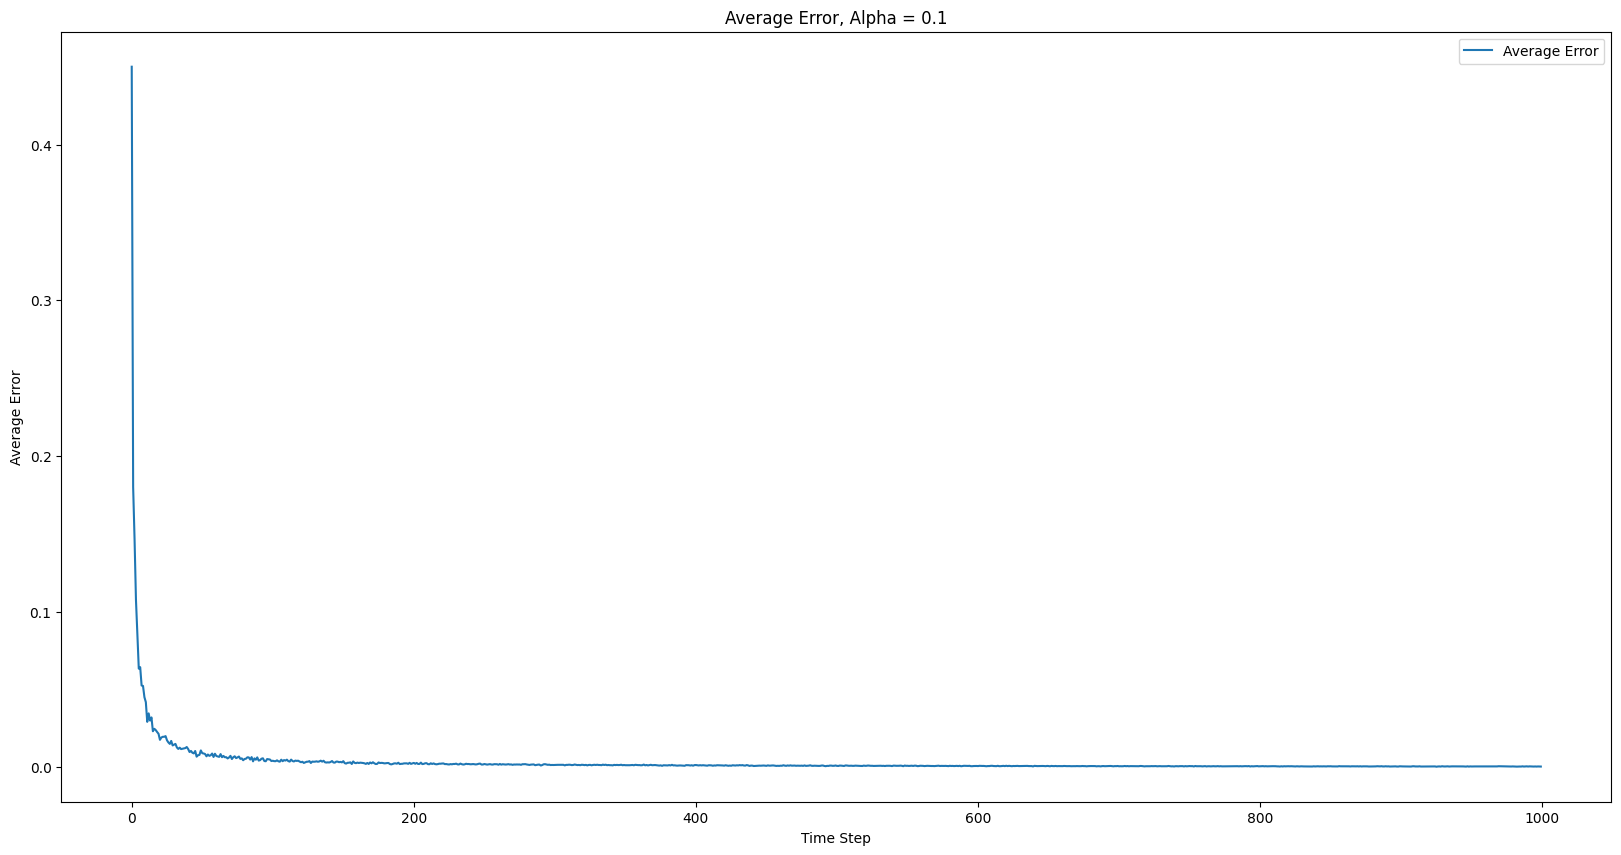

In [ ]:
#Question 7
for i in range(num_runs):
    bandit_71 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        action11 = (bandit_71.thomson_sampling())
        action_11[i,j] = action11
        # print(bandit_61.est_p)
        # print(bandit_61.n)
        reward_11[i,j] = bandit_71.sample(action11)
        error_11[i,j] = abs(bandit_71.std_error(action11, reward_11[i,j], j+1))
        regret_11[i,j] = p[np.argmax(p)] - p[action_11[i,j]]
        bandit_71.update_thomson(action11, reward_11[i,j])
        # bandit_61.n[action1] += 1
avg_reward11 = np.mean(reward_11, axis=0)    
avg_error11 = np.mean(error_11, axis=0)
instant_regret_11 = np.mean(regret_11, axis=0)
first_fraction_11 = bandit_71.first_fraction(num_runs, num_timestep, action_11)
total_regret_11 = np.cumsum(instant_regret_11)

#plot fraction of the first action taken
plt.figure()
plt.title("Instant regret, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_11, label="Instant regret")
# plt.plot(range(num_timestep), instant_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Instant regret
plt.figure()
plt.title("Total regret, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_11, label = "Total regret")
# plt.plot(range(num_timestep), total_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Fraction of first move
plt.figure()
plt.title("First action estimated as best, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_11, label = "Fraction of first action")
# plt.plot(range(num_timestep), first_fraction_2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Reward, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward11, label = "Average Reward")
# plt.plot(range(num_timestep), avg_reward2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,10])
plt.title("Average Error, Alpha = 0.1")
plt.xlabel("Time Step")
plt.ylabel("Average Error")
plt.plot(range(num_timestep), avg_error11, label = "Average Error")
# plt.plot(range(num_timestep), avg_error2, label="Epsilon = 1/8")
plt.legend()
plt.show()


# Q8

For this case I've decided to use epsilon value of 0.125 for epsilon greedy algorithm, for UCB I've used c = 2 and for the update of the estimated rewards I've used alpha = 0.001. For the experiments I've used the same number of run and timesteps. Initially, Epsilon greedy method performs the best because I've used very low values of epsilon, if you compare this with UCB which performs the worst in all metrics. As the number of timesteps increases, UCB converged to the true values of rewards and it performs the best in all metrics. For the case of Thomson sampling, it performs slightly less better than UCB. If increase the number of timesteps, it'll perform better than UCB. In conclusion, UCB performs the best compared to other algorithms.

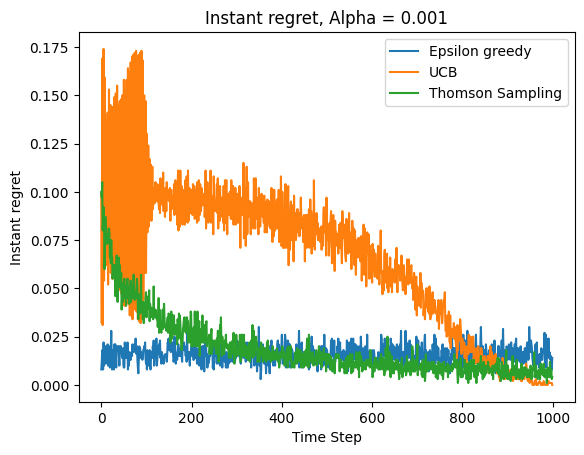

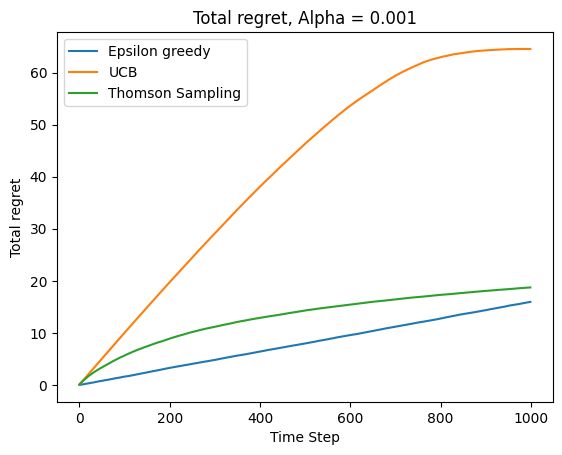

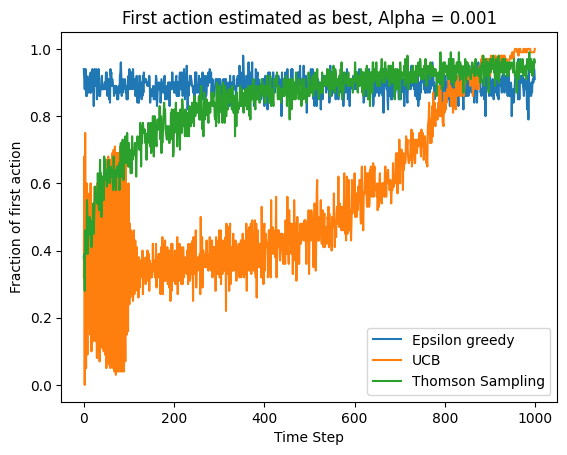

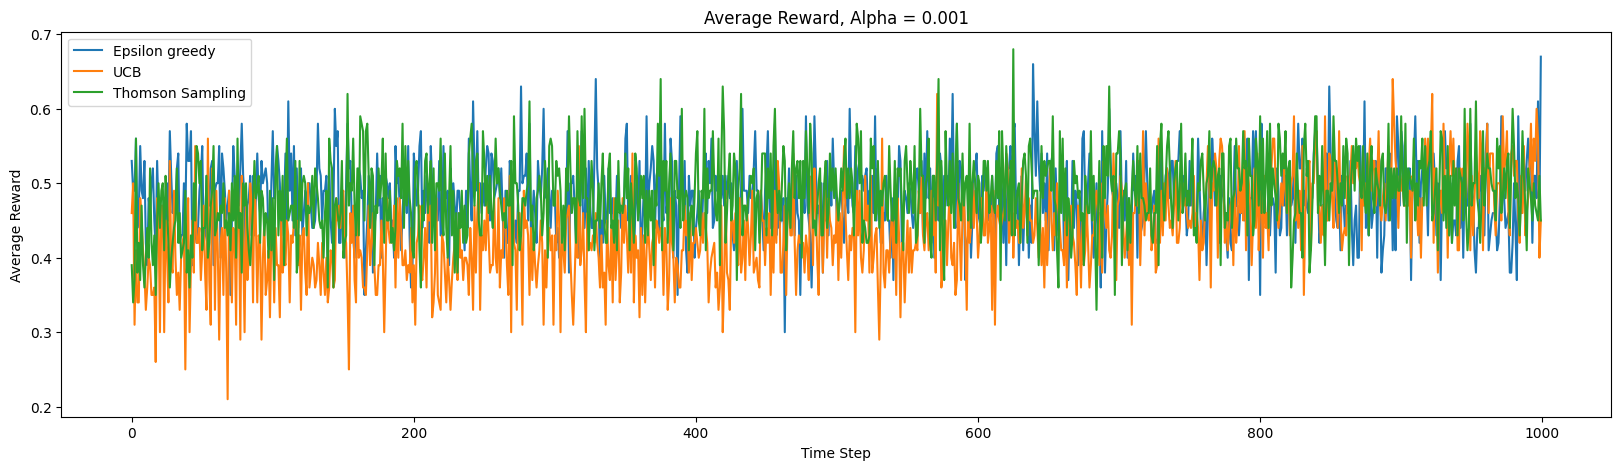

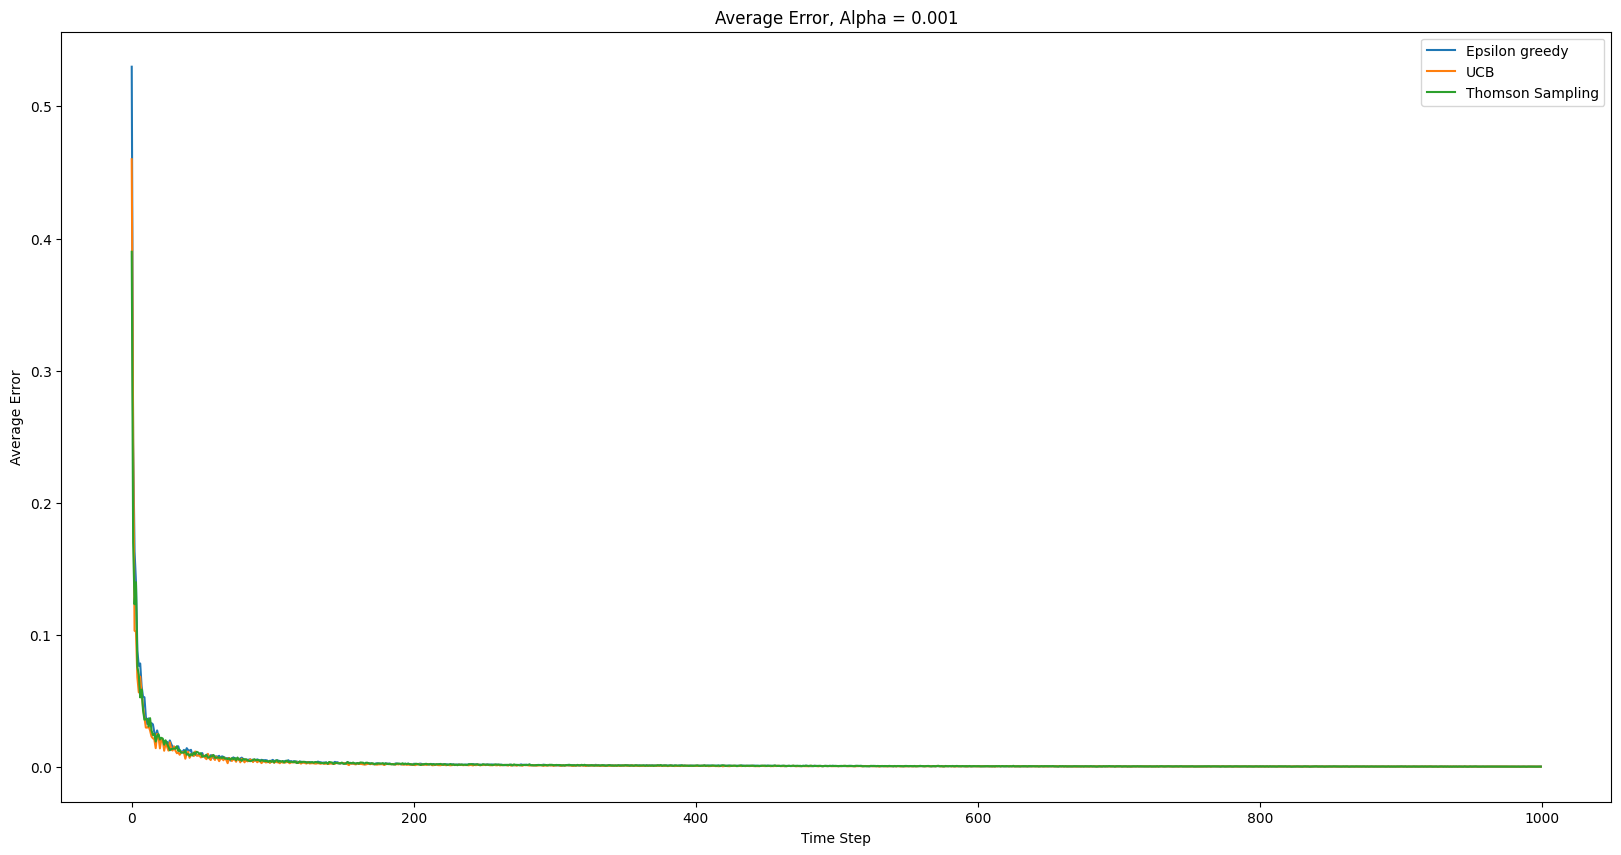

In [ ]:
reward_11 = np.zeros((num_runs, num_timestep))
reward_12 = np.zeros((num_runs, num_timestep))
reward_13 = np.zeros((num_runs, num_timestep))
action_11 = np.zeros((num_runs, num_timestep), dtype = int)
action_12 = np.zeros((num_runs, num_timestep), dtype = int)
action_13 = np.zeros((num_runs, num_timestep), dtype = int)
regret_11 = np.zeros((num_runs, num_timestep))
regret_12 = np.zeros((num_runs, num_timestep))
regret_13 = np.zeros((num_runs, num_timestep))
error_11 = np.zeros((num_runs, num_timestep))
error_12 = np.zeros((num_runs, num_timestep))
error_13 = np.zeros((num_runs, num_timestep))
delta = 0.1
p = [0.5, 0.5-delta, 0.5-2*delta]
p_i = 0.0
c = 2
alpha = 0.001
# alpha = 0.001
for i in range(num_runs):
    bandit_81 = Bernoullibandit(p=p,p_i=0)
    bandit_82 = Bernoullibandit(p=p,p_i=0)
    bandit_83 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        action11 = (bandit_81.epsilon_greedy(epsilon=0.125))
        action12 = (bandit_82.ucb(c, j))
        action13 = (bandit_83.thomson_sampling())
        action_11[i,j] = action11
        action_12[i,j] = action12
        action_13[i,j] = action13
        # print(bandit_61.est_p)
        # print(bandit_61.n)
        reward_11[i,j] = bandit_81.sample(int(action11))
        reward_12[i,j] = bandit_82.sample(int(action12))
        reward_13[i,j] = bandit_83.sample(int(action13))
        error_11[i,j] = abs(bandit_81.std_error(action11, reward_11[i,j], j+1))
        error_12[i,j] = abs(bandit_82.std_error(action12, reward_12[i,j], j+1))
        error_13[i,j] = abs(bandit_83.std_error(action13, reward_13[i,j], j+1))
        regret_11[i,j] = p[np.argmax(p)] - p[action_11[i,j]]
        regret_12[i,j] = p[np.argmax(p)] - p[action_12[i,j]]
        regret_13[i,j] = p[np.argmax(p)] - p[action_13[i,j]]
        bandit_81.update(action_11[i,j], reward_11[i,j], alpha = 0.001)
        bandit_83.update_thomson(action_13[i,j], reward_13[i,j])
        bandit_82.update(action_12[i,j], reward_12[i,j], alpha = 0.001)
        bandit_82.n[action12] += 1
        
avg_reward11 = np.mean(reward_11, axis=0)  
avg_reward12 = np.mean(reward_12, axis=0)
avg_reward13 = np.mean(reward_13, axis=0)  
avg_error11 = np.mean(error_11, axis=0)
avg_error12 = np.mean(error_12, axis=0)
avg_error13 = np.mean(error_13, axis=0)
instant_regret_11 = np.mean(regret_11, axis=0)
instant_regret_12 = np.mean(regret_12, axis=0)
instant_regret_13 = np.mean(regret_13, axis=0)
first_fraction_11 = bandit_81.first_fraction(num_runs, num_timestep, action_11)
first_fraction_12 = bandit_82.first_fraction(num_runs, num_timestep, action_12)
first_fraction_13 = bandit_83.first_fraction(num_runs, num_timestep, action_13)
total_regret_11 = np.cumsum(instant_regret_11)
total_regret_12 = np.cumsum(instant_regret_12)
total_regret_13 = np.cumsum(instant_regret_13)

#plot fraction of the first action taken
plt.figure()
plt.title("Instant regret, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Instant regret")
plt.plot(range(num_timestep), instant_regret_11, label="Epsilon greedy")
plt.plot(range(num_timestep), instant_regret_12, label="UCB")
plt.plot(range(num_timestep), instant_regret_13, label="Thomson Sampling")
# plt.plot(range(num_timestep), instant_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Instant regret
plt.figure()
plt.title("Total regret, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Total regret")
plt.plot(range(num_timestep), total_regret_11, label="Epsilon greedy")
plt.plot(range(num_timestep), total_regret_12, label="UCB")
plt.plot(range(num_timestep), total_regret_13, label="Thomson Sampling")
# plt.plot(range(num_timestep), total_regret_2, label="Epsilon = 1/8")
plt.legend()
plt.show()
#Fraction of first move
plt.figure()
plt.title("First action estimated as best, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Fraction of first action")
plt.plot(range(num_timestep), first_fraction_11, label = "Epsilon greedy")
plt.plot(range(num_timestep), first_fraction_12, label = "UCB")
plt.plot(range(num_timestep), first_fraction_13, label = "Thomson Sampling")
# plt.plot(range(num_timestep), first_fraction_2, label="Epsilon = 1/8")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.title("Average Reward, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward11, label = "Epsilon greedy")
plt.plot(range(num_timestep), avg_reward12, label = "UCB")
plt.plot(range(num_timestep), avg_reward13, label = "Thomson Sampling")
plt.legend()
plt.show()

plt.figure(figsize=[20,10])
plt.title("Average Error, Alpha = 0.001")
plt.xlabel("Time Step")
plt.ylabel("Average Error")
plt.plot(range(num_timestep), avg_error11, label = "Epsilon greedy")
plt.plot(range(num_timestep), avg_error12, label = "UCB")
plt.plot(range(num_timestep), avg_error13, label = "Thomson Sampling")
plt.legend()
plt.show()


# Q9

Based on these results it seems that UCB was the best at adapting to the new action reward values. With alpha = 0.1, e-greedy was the worst at estimating the reward value of the best arm compared to the other methods. The other methods were also able to adapt to the new action reward values but not as quick as UCB when using averaging values. When using alpha updates, all methods other than thompson sampling were able to quickly adapt. The best algorithm suited to cope with non-stationary in this case is UCB.

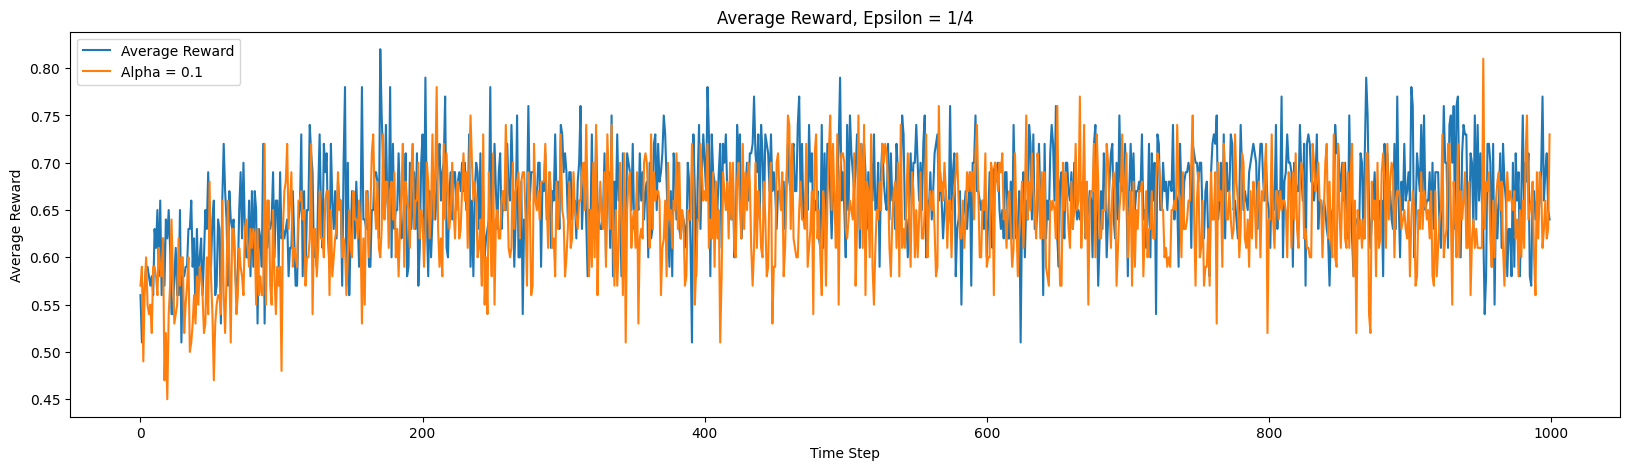

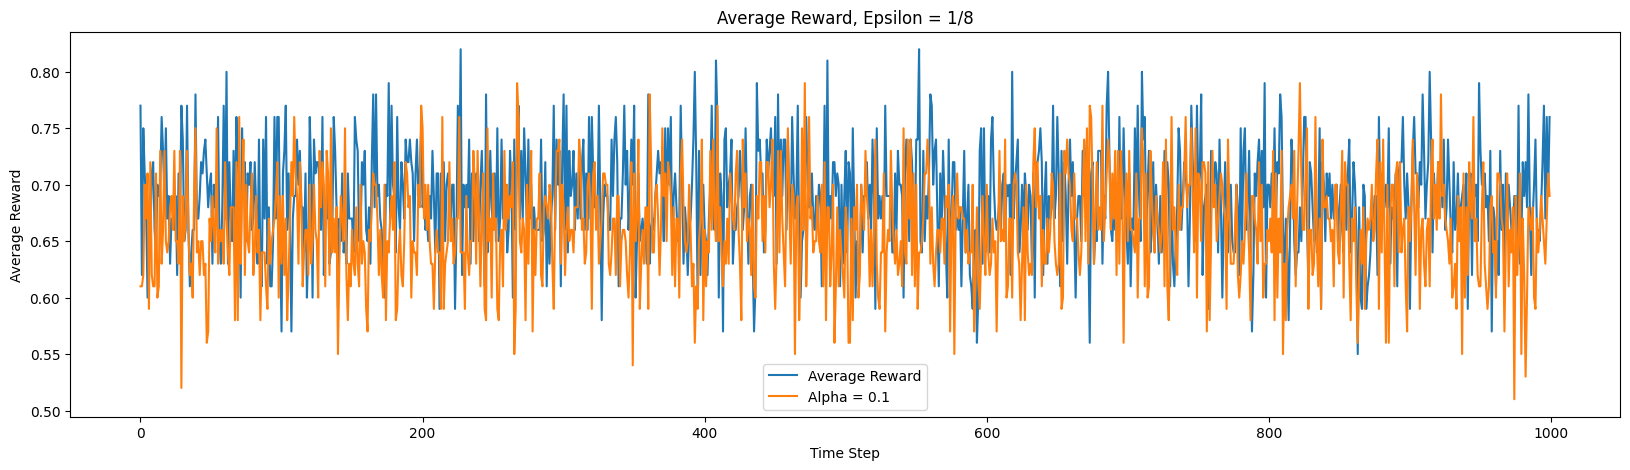

In [ ]:


for i in range(num_runs):
    bandit_91 = Bernoullibandit(p=p,p_i=0)
    bandit_92 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        if j < 500:
            # print(j)
            p = [0.5, 0.4, 0.3]
        else:
            # print(j)
            p = [0.5, 0.6, 0.7]
        action1 = (bandit_91.epsilon_greedy(0.25))
        action2 = (bandit_92.epsilon_greedy(0.25))
        reward_1[i,j] = bandit_91.sample(action1)
        reward_2[i,j] = bandit_92.sample(action2)
        bandit_91.updateAvg(action1, reward_1[i,j])
        bandit_92.update(action2, reward_2[i,j], alpha = 0.1)
        # bandit_61.n[action1] += 1

avg_reward1 = np.mean(reward_1, axis=0)
avg_reward2 = np.mean(reward_2, axis=0)
plt.figure(figsize=[20,5])
plt.title("Average Reward, Epsilon = 1/4")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward1, label = "Average Reward")
plt.plot(range(num_timestep), avg_reward2, label="Alpha = 0.1")
plt.legend()
plt.show()

reward_1 = np.zeros((num_runs, num_timestep))
reward_2 = np.zeros((num_runs, num_timestep))
for i in range(num_runs):
    bandit_911 = Bernoullibandit(p=p,p_i=0)
    bandit_922 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        if j < 500:
            # print(j)
            p = [0.5, 0.4, 0.3]
        else:
            # print(j)
            p = [0.5, 0.6, 0.7]
        action1 = (bandit_91.epsilon_greedy(0.125))
        action2 = (bandit_92.epsilon_greedy(0.125))
        reward_1[i,j] = bandit_91.sample(action1)
        reward_2[i,j] = bandit_92.sample(action2)
        bandit_91.updateAvg(action1, reward_1[i,j])
        bandit_92.update(action2, reward_2[i,j], alpha = 0.1)
        # bandit_61.n[action1] += 1

avg_reward1 = np.mean(reward_1, axis=0)
avg_reward2 = np.mean(reward_2, axis=0)
plt.figure(figsize=[20,5])
plt.title("Average Reward, Epsilon = 1/8")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward1, label = "Average Reward")
plt.plot(range(num_timestep), avg_reward2, label="Alpha = 0.1")
plt.legend()
plt.show()



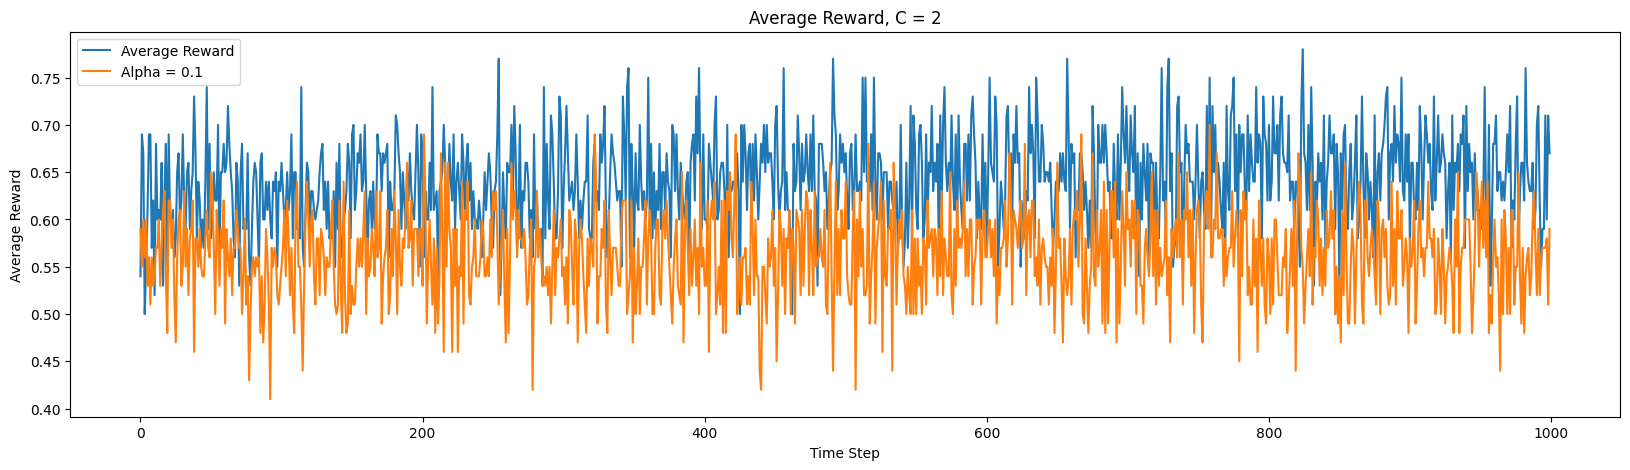

In [ ]:
reward_1 = np.zeros((num_runs, num_timestep))
reward_2 = np.zeros((num_runs, num_timestep))
for i in range(num_runs):
    bandit_921 = Bernoullibandit(p=p,p_i=0)
    bandit_922 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        if j < 500:
            # print(j)
            p = [0.5, 0.4, 0.3]
        else:
            # print(j)
            p = [0.5, 0.6, 0.7]
        action1 = (bandit_921.ucb(c=2, t= j))
        action2 = (bandit_922.ucb(c=2, t= j))
        reward_1[i,j] = bandit_921.sample(action1)
        reward_2[i,j] = bandit_922.sample(action2)
        bandit_921.updateAvg(action1, reward_1[i,j])
        bandit_922.update(action2, reward_2[i,j], alpha = 0.1)
        # bandit_61.n[action1] += 1

avg_reward1 = np.mean(reward_1, axis=0)
avg_reward2 = np.mean(reward_2, axis=0)
plt.figure(figsize=[20,5])
plt.title("Average Reward, C = 2")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward1, label = "Average Reward")
plt.plot(range(num_timestep), avg_reward2, label="Alpha = 0.1")
plt.legend()
plt.show()


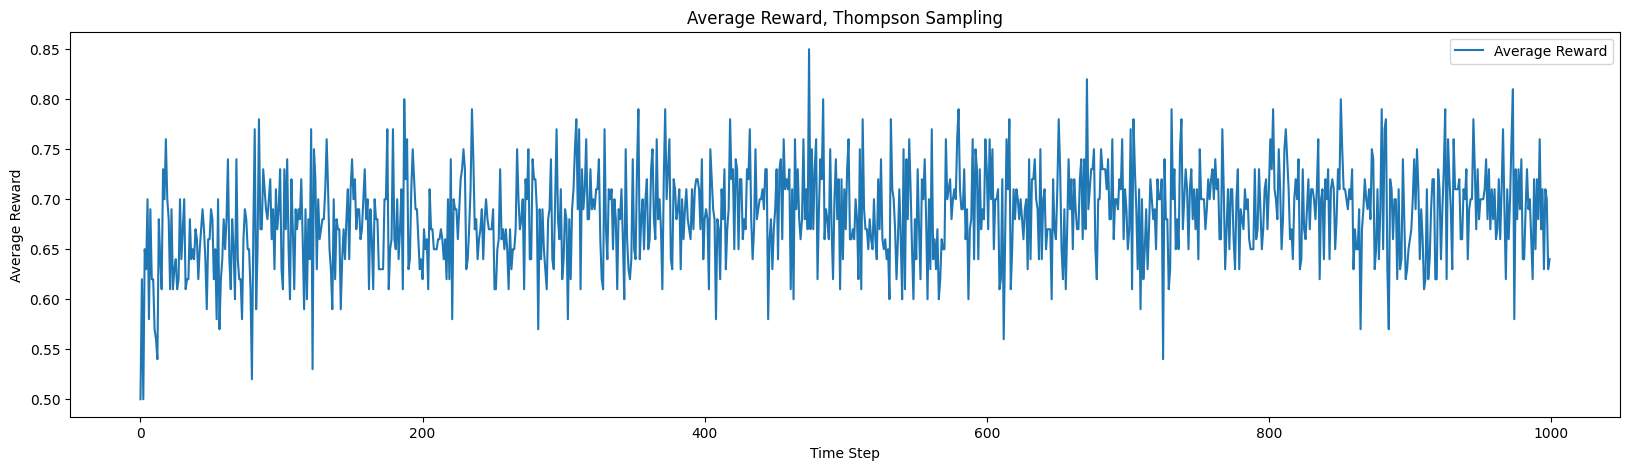

In [ ]:
reward_1 = np.zeros((num_runs, num_timestep))
reward_2 = np.zeros((num_runs, num_timestep))
for i in range(num_runs):
    bandit_931 = Bernoullibandit(p=p,p_i=0)
    # bandit_932 = Bernoullibandit(p=p,p_i=0)
    for j in range(num_timestep):
        if j < 500:
            # print(j)
            p = [0.5, 0.4, 0.3]
        else:
            # print(j)
            p = [0.5, 0.6, 0.7]
        action1 = (bandit_931.thomson_sampling())
        # action2 = (bandit_932.thomson_sampling())
        reward_1[i,j] = bandit_921.sample(action1)
        # reward_2[i,j] = bandit_922.sample(action2)
        bandit_931.update_thomson(action1, reward_1[i,j])
        # bandit_932.update_thomson(action2, reward_2[i,j])
        # bandit_931.update(action1, reward_1[i,j], alpha = 0.1)
        # bandit_932.update(action2, reward_2[i,j], alpha = 0.1)
        # bandit_61.n[action1] += 1

avg_reward1 = np.mean(reward_1, axis=0)
# avg_reward2 = np.mean(reward_2, axis=0)
plt.figure(figsize=[20,5])
plt.title("Average Reward, Thompson Sampling")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.plot(range(num_timestep), avg_reward1, label = "Average Reward")
# plt.plot(range(num_timestep), avg_reward2, label="Alpha = 0.1")
plt.legend()
plt.show()
